In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from pprint import pprint
import folium
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("madrid.csv")

In [3]:
df["price"]  = df["price"] .apply(lambda x: float(x.strip("$").replace(',', '')) if pd.notnull(x) else x)

In [4]:
df

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6369,https://www.airbnb.com/rooms/6369,20220911230855,2022-09-12,city scrape,"Rooftop terrace room , ensuite bathroom",Excellent connection with the AIRPORT and EXHI...,NaN,https://a0.muscache.com/pictures/683224/4cc318...,13660,...,4.85,4.82,4.85,NaN,f,1,0,1,0,0.65
1,21853,https://www.airbnb.com/rooms/21853,20220911230855,2022-09-12,city scrape,Bright and airy room,We have a quiet and sunny room with a good vie...,We live in a leafy neighbourhood with plenty o...,https://a0.muscache.com/pictures/68483181/87bc...,83531,...,4.82,4.21,4.67,NaN,f,2,0,2,0,0.34
2,24805,https://www.airbnb.com/rooms/24805,20220911230855,2022-09-12,city scrape,Gran Via Studio Madrid,"Studio located 50 meters from Gran Via, next t...","The area is next to the Gran Via, so people li...",https://a0.muscache.com/pictures/miso/Hosting-...,346366726,...,5.00,5.00,4.83,NaN,f,1,1,0,0,0.25
3,26825,https://www.airbnb.com/rooms/26825,20220911230855,2022-09-12,city scrape,Single Room whith private Bathroom,Nice and cozy roon for one person with a priva...,"Es un barrio muy tranquilo, en una zona de Mad...",https://a0.muscache.com/pictures/149358/218d5b...,114340,...,4.73,4.73,4.74,NaN,f,1,0,1,0,1.10
4,363476,https://www.airbnb.com/rooms/363476,20220911230855,2022-09-12,city scrape,PUERTA DEL SOL-QUIET DOWNTOWN,<b>The space</b><br />We want to welcome this ...,NaN,https://a0.muscache.com/pictures/4264879/ee070...,1836617,...,4.79,4.97,4.52,NaN,f,1,0,1,0,3.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20676,50986852,https://www.airbnb.com/rooms/50986852,20220911230855,2022-09-12,city scrape,Precioso apartamento para 5 personas,Disfruta de la sencillez de este alojamiento t...,NaN,https://a0.muscache.com/pictures/b2da2e0f-3c5c...,17074819,...,5.00,4.00,5.00,NaN,f,5,2,3,0,0.59
20677,16486548,https://www.airbnb.com/rooms/16486548,20220911230855,2022-09-12,city scrape,"Amplio, luminoso y confortable",Espectacular piso compartido decoracion modern...,NaN,https://a0.muscache.com/pictures/3b89555a-530d...,30696902,...,4.67,4.00,4.00,NaN,f,8,2,6,0,0.36
20678,11961106,https://www.airbnb.com/rooms/11961106,20220911230855,2022-09-12,city scrape,Getafe Carlos III University,"The house is located in the center of Getafe ,...",NaN,https://a0.muscache.com/pictures/1367b7db-14d5...,63883696,...,4.82,4.65,4.82,NaN,f,1,0,1,0,0.24
20679,43692572,https://www.airbnb.com/rooms/43692572,20220911230855,2022-09-12,city scrape,Precioso Duplex con encanto en Pozuelo,Precioso Duplex de 2 habitaciones listo para r...,"Ubicado en la zona de la Avenida de Europa, en...",https://a0.muscache.com/pictures/61131c33-f557...,85797262,...,4.83,4.83,4.67,NaN,f,2,1,1,0,0.44


In [5]:
#df = df[df["price"]<1000]

## neighborhood_overview

In [6]:
from collections import Counter

Counter(df["neighborhood_overview"].isnull())

Counter({True: 9209, False: 11472})

In [7]:
Counter(df["neighbourhood"])

Counter({nan: 9209,
         'Madrid, Spain': 342,
         'Madrid, Comunidad de Madrid, Spain': 10360,
         'Madrid, Community of Madrid, Spain': 493,
         'Madrid, Comunidad de  Madrid, Spain': 2,
         'MADRID, Spain': 10,
         'Madrid, Co, Spain': 11,
         'Madrid , Madrid, Spain': 6,
         'Madrid, madrid, Spain': 1,
         'Aravaca (Madrid), Community of Madrid, Spain': 1,
         'madrid, Comunidad de Madrid, Spain': 1,
         'Madrid, MADRID, Spain': 1,
         'Madrid , Comunidad de Madrid, Spain': 10,
         'Madrid, Comunidad de Madrid, ES, Madrid, Spain': 2,
         'madrid, Madrid, Spain': 1,
         'Pozuelo de Alarcón, Comunidad de Madrid, Spain': 42,
         '马德里, 马德里自治区, Spain': 1,
         'Madrid, Palos de Moguer , Spain': 1,
         'Madrid, Comunidad de Madrid , Atocha, Spain': 2,
         'Madrid, La Latina/Palacio , Madrid, Spain': 1,
         'Madrid, Madrid , Spain': 1,
         'Las Rozas, Comunidad de Madrid, Spain': 4,
    

In [8]:
len(Counter(df["neighbourhood_cleansed"]))

128

<AxesSubplot:xlabel='neighbourhood_cleansed', ylabel='count'>

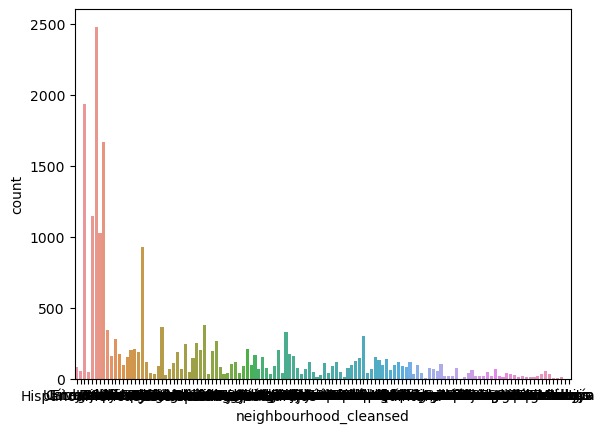

In [9]:
sns.countplot(x = df["neighbourhood_cleansed"])

<AxesSubplot:xlabel='neighbourhood_cleansed', ylabel='price'>

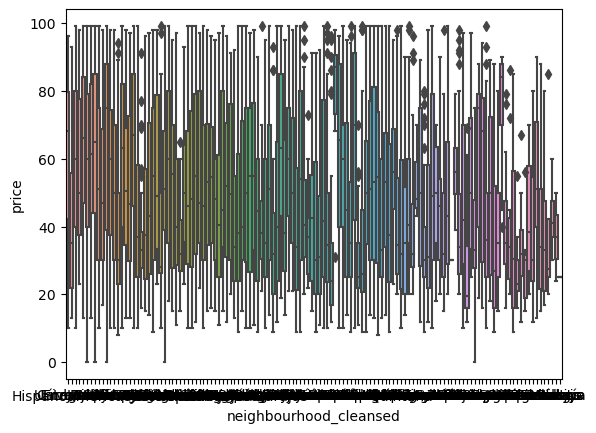

In [10]:

sns.boxplot(x = df["neighbourhood_cleansed"], y = df[df["price"] < 100]["price"])

### A lot of outliers in price


<AxesSubplot:xlabel='neighbourhood_group_cleansed', ylabel='count'>

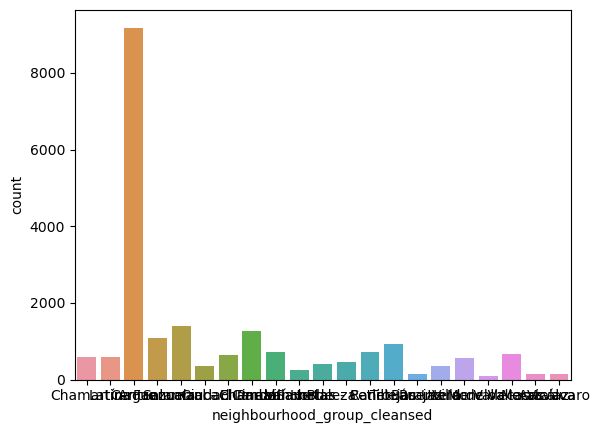

In [11]:
sns.countplot(x = df["neighbourhood_group_cleansed"])

<AxesSubplot:xlabel='neighbourhood_group_cleansed', ylabel='price'>

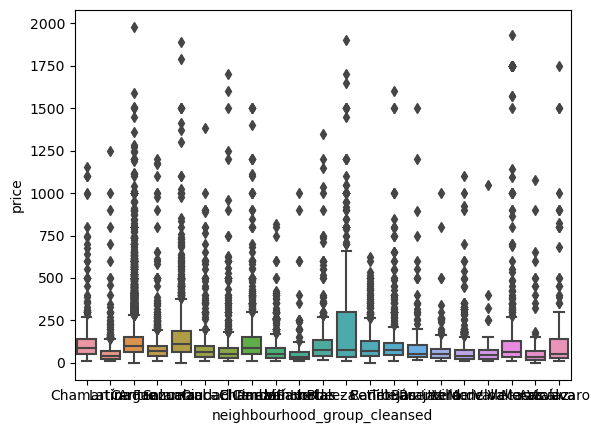

In [12]:
sns.boxplot(x = df["neighbourhood_group_cleansed"],y = df[df["price"] < 2000]["price"])

<AxesSubplot:xlabel='neighbourhood_group_cleansed', ylabel='price'>

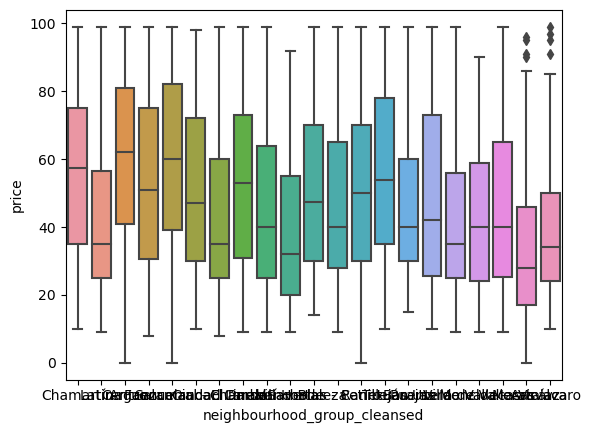

In [13]:
sns.boxplot(x = df["neighbourhood_group_cleansed"], y = df[df["price"] < 100]["price"])

In [14]:
len(df[df["price"] < 100]["price"])

12367

In [15]:
len(df[df["price"].between(100,500)]["price"])

7715

In [16]:
len(df[df["price"].between(500,2000)]["price"])

658

In [17]:
len(df[df["price"].between(2000,11000)]["price"])

52

<AxesSubplot:xlabel='neighbourhood_group_cleansed', ylabel='price'>

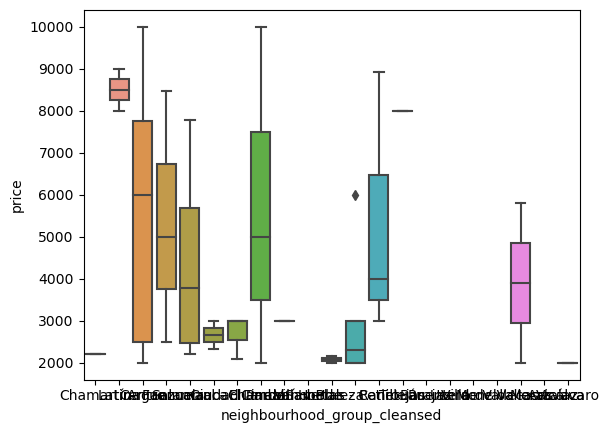

In [18]:
sns.boxplot(x = df["neighbourhood_group_cleansed"],y = df[df["price"].between(2000,11000)]["price"])

# Good candidate for the prediction

<AxesSubplot:xlabel='neighbourhood_group_cleansed', ylabel='price'>

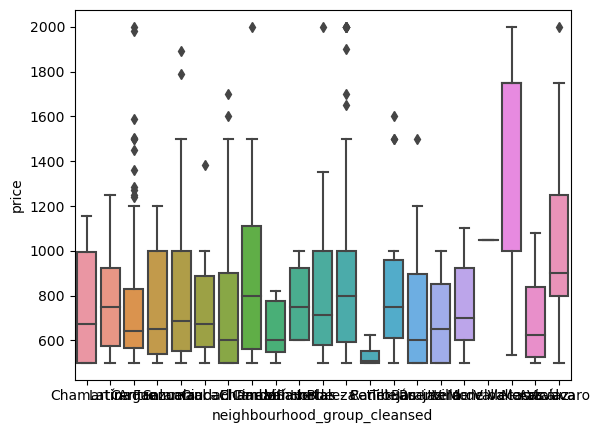

In [19]:
sns.boxplot(x = df["neighbourhood_group_cleansed"],y = df[df["price"].between(500,2000)]["price"])

## Encoding neighbourhood_group_cleansed with label encoder

In [20]:
# Inicializing object LabelEncoder()
o_labelEncoding = LabelEncoder()

# Training it with the column data
o_labelEncoding.fit(df["neighbourhood_group_cleansed"].values)

# Transform the column
neighbourhood_group_cleansed = o_labelEncoding.transform(df["neighbourhood_group_cleansed"].values)

df["neighbourhood_group_cleansed"] = neighbourhood_group_cleansed

## Encoding neighbourhood_group_cleansed with C.P.

### Discarded: it does not improve the model and give some issues with the rest of the cities

In [21]:
# d_neighbourhood_group_cleansed_cp = {"Centro": 28013, "Arganzuela": 28045, "Retiro": 28007, "Salamanca": 28001, "Chamartín": 28002, "Tetuán": 28020, "Chamberí": 28010, "Fuencarral - El Pardo": 28029, "Moncloa - Aravaca": 28008, "Latina": 28044, "Carabanchel": 28025, "Usera": 28026, "Puente de Vallecas": 28038, "Moratalaz": 28030, "Ciudad Lineal": 28037, "Hortaleza": 28043, "Villaverde": 28021, "Villa de Vallecas": 28031, "Vicálvaro": 28032, "San Blas - Canillejas": 28022, "Barajas": 28042}

# for i, j in d_neighbourhood_group_cleansed_cp.items():
#     df["neighbourhood_group_cleansed"].replace(i, j, inplace=True)

# df["neighbourhood_group_cleansed"].unique()

## Latitud

<AxesSubplot:xlabel='latitude', ylabel='count'>

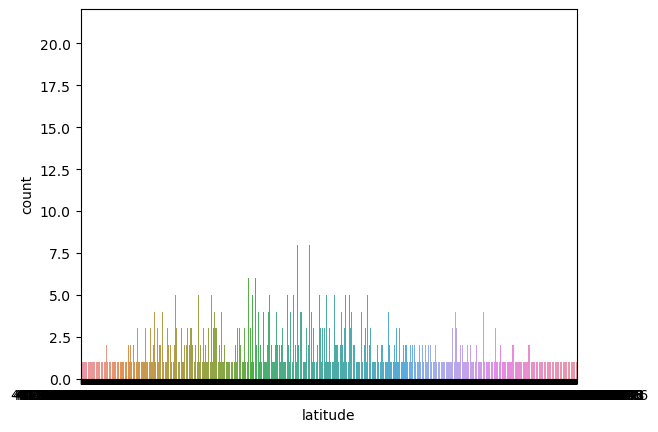

In [22]:
sns.countplot(x = df[df["price"] > 100]["latitude"])

## property_type

In [23]:
dict_property_types = dict(Counter(df["property_type"]))

dict_property_types

{'Private room in rental unit': 5200,
 'Entire rental unit': 10478,
 'Private room in home': 646,
 'Entire loft': 761,
 'Entire condo': 721,
 'Private room in bed and breakfast': 113,
 'Private room in casa particular': 234,
 'Private room in guest suite': 52,
 'Private room in chalet': 59,
 'Entire home': 229,
 'Entire serviced apartment': 377,
 'Private room in condo': 398,
 'Shared room in rental unit': 143,
 'Entire place': 17,
 'Shared room in hut': 1,
 'Entire bungalow': 2,
 'Private room in loft': 42,
 'Entire vacation home': 63,
 'Casa particular': 12,
 'Dome': 1,
 'Room in serviced apartment': 8,
 'Private room': 44,
 'Shared room in home': 21,
 'Room in boutique hotel': 83,
 'Private room in guesthouse': 45,
 'Entire bed and breakfast': 1,
 'Private room in townhouse': 48,
 'Entire townhouse': 30,
 'Room in aparthotel': 39,
 'Private room in hostel': 224,
 'Entire guesthouse': 28,
 'Private room in floor': 12,
 'Floor': 7,
 'Room in hotel': 93,
 'Shared room in loft': 10,
 'S

In [24]:
dict_property_types[list(dict_property_types.keys())[0]]

5200

In [25]:
list_others = []
for i in dict_property_types.keys():
    
    if dict_property_types[i] < 300:
        
        list_others.append(i)

In [26]:
df["property_type"].values[0]

'Private room in rental unit'

In [27]:
for i in list_others:
    
    df["property_type"].replace(i,"Other", inplace = True)

In [28]:
df["property_type"].value_counts()

Entire rental unit             10478
Private room in rental unit     5200
Other                           2100
Entire loft                      761
Entire condo                     721
Private room in home             646
Private room in condo            398
Entire serviced apartment        377
Name: property_type, dtype: int64

<AxesSubplot:xlabel='property_type', ylabel='count'>

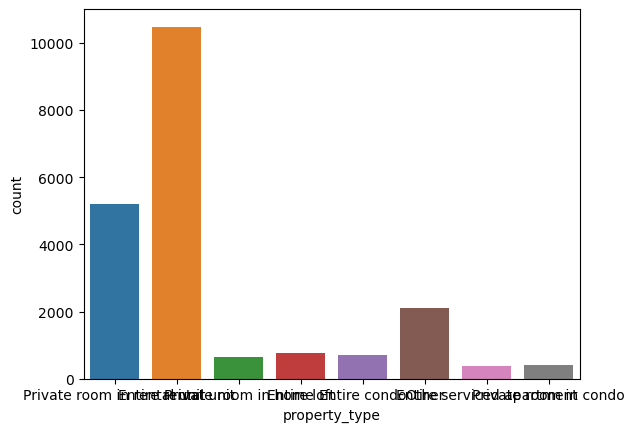

In [29]:
sns.countplot(x = df["property_type"])

### Encoding property_type with the mean values of the price

It does not improve the model

In [30]:
# df.groupby("property_type").mean().price

# for i, j in zip(df.groupby("property_type").mean().price.index, df.groupby("property_type").mean().price.values):
#     df["property_type"].replace(i, j, inplace = True)

### Encoding property_type with get dummies

It does not improve the model

In [31]:
# df_property_type = dummies(df, "property_type")

# df = pd.concat([df, df_property_type], axis = 1)

# df.drop("property_type", axis = 1, inplace = True)

# df_property_type.columns

### Encoding property_type with label encoder

In [32]:
# Inicializing object LabelEncoder()
o_labelEncoding = LabelEncoder()

# Training it with the column data
o_labelEncoding.fit(df["property_type"].values)

# Transform the column
property_type = o_labelEncoding.transform(df["property_type"].values)

In [33]:
df["property_type"] = property_type

In [34]:
from collections import Counter
dict_property_types = dict(Counter(df["property_type"]))

dict_property_types[list(dict_property_types.keys())[0]]

list_others = []
for i in dict_property_types.keys():
    
    if dict_property_types[i] < 300:
        
        list_others.append(i)
        
for i in list_others:
    
    df["property_type"].replace(i,"Other", inplace = True)

df["property_type"].value_counts()

2    10478
7     5200
4     2100
1      761
0      721
6      646
5      398
3      377
Name: property_type, dtype: int64

In [35]:
df_property_type = df.groupby("property_type").mean().price
df_property_type

property_type
0    146.123440
1    104.467806
2    157.354315
3    206.949602
4    176.554762
5     74.502513
6    178.952012
7     80.191731
Name: price, dtype: float64

<AxesSubplot:xlabel='property_type'>

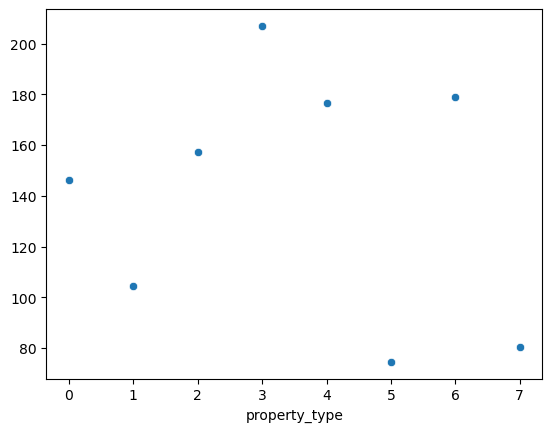

In [36]:
sns.scatterplot(x=df_property_type.index, y = df_property_type.values)

## room_type

<AxesSubplot:xlabel='price', ylabel='count'>

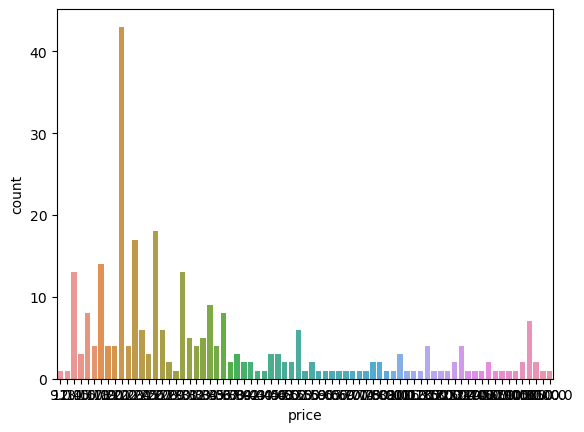

In [37]:
sns.countplot(x = df[df["room_type"] == "Shared room"]["price"])

<AxesSubplot:xlabel='price', ylabel='count'>

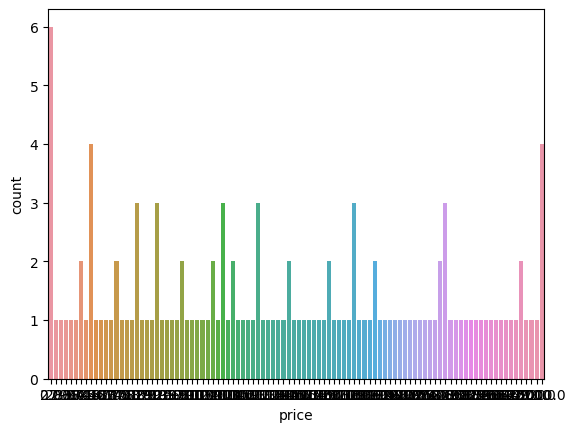

In [38]:
sns.countplot(x = df[df["room_type"] == "Hotel room"]["price"])

<AxesSubplot:xlabel='price', ylabel='count'>

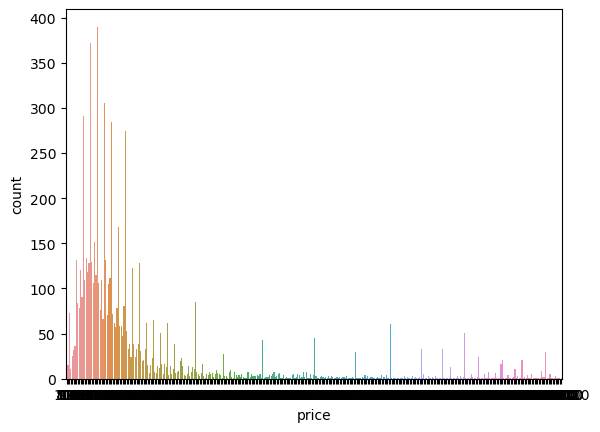

In [39]:
sns.countplot(x = df[df["room_type"] == "Private room"]["price"])

<AxesSubplot:xlabel='price', ylabel='count'>

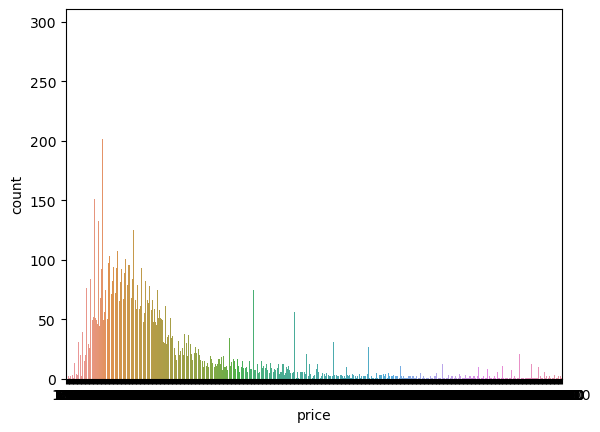

In [40]:
sns.countplot(x = df[df["room_type"] == "Entire home/apt"]["price"])

<AxesSubplot:xlabel='room_type', ylabel='count'>

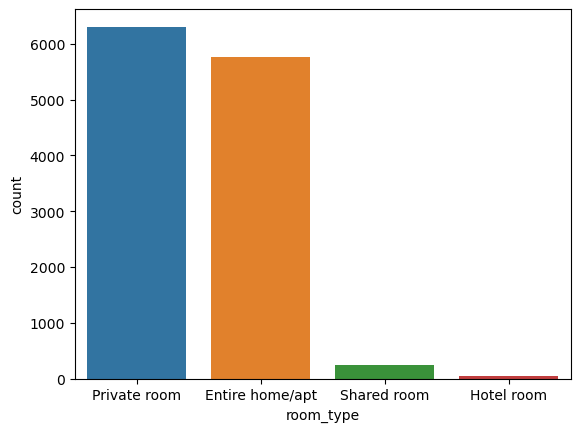

In [41]:
sns.countplot(x = df[df["price"] < 100]["room_type"])

<AxesSubplot:xlabel='room_type', ylabel='count'>

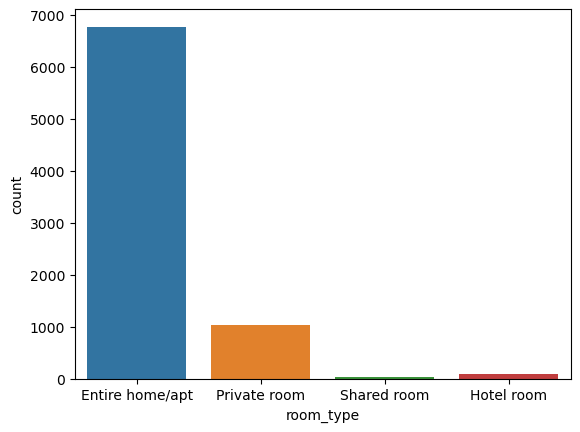

In [42]:
sns.countplot(x = df[df["price"] > 100]["room_type"])

## Encoding room_type with get dummies

In [43]:
def dummies(data, column):
    return pd.get_dummies(data = data[column])

In [44]:
df_room_type = dummies(df, "room_type")

df = pd.concat([df, df_room_type], axis = 1)

df.drop("room_type", axis = 1, inplace = True)

df_room_type.columns

Index(['Entire home/apt', 'Hotel room', 'Private room', 'Shared room'], dtype='object')

## accommodates

it looks like there are some outliers in acomodates > 30

<AxesSubplot:xlabel='accommodates', ylabel='count'>

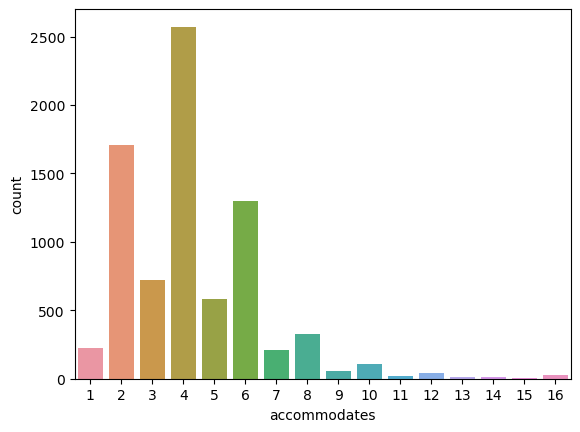

In [45]:
sns.countplot(x = df[df["price"] > 100]["accommodates"])

In [46]:
for i in df["accommodates"].values:
    
    if i > 8:
        
        df["accommodates"].replace(i,9, inplace = True)

<AxesSubplot:xlabel='accommodates', ylabel='count'>

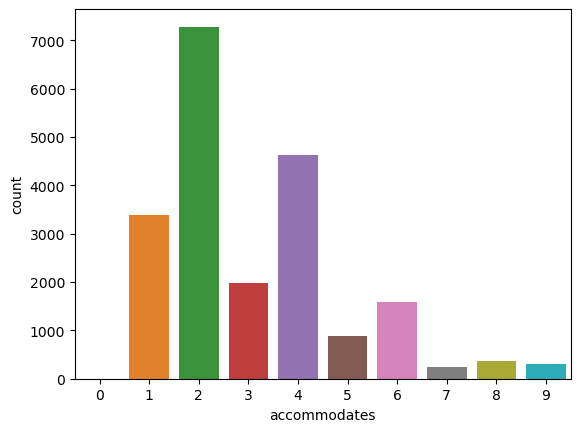

In [47]:
sns.countplot(x = df["accommodates"])

## bathrooms

In [48]:
Counter(df[df["price"] < 100]["bathrooms_text"])

Counter({'1 private bath': 964,
         '1 bath': 5437,
         '1.5 shared baths': 619,
         '2 baths': 497,
         '1.5 baths': 603,
         '1 shared bath': 3280,
         '2 shared baths': 537,
         nan: 16,
         'Shared half-bath': 11,
         'Half-bath': 9,
         '3 shared baths': 81,
         '3 baths': 30,
         '0 baths': 21,
         '2.5 baths': 30,
         '0 shared baths': 41,
         '8 shared baths': 21,
         '4.5 shared baths': 8,
         '2.5 shared baths': 52,
         '6 shared baths': 5,
         '5.5 shared baths': 1,
         '4 shared baths': 68,
         '3.5 shared baths': 8,
         'Private half-bath': 2,
         '5 shared baths': 11,
         '4 baths': 9,
         '8 baths': 1,
         '7 shared baths': 2,
         '20 shared baths': 1,
         '3.5 baths': 1,
         '6 baths': 1})

<AxesSubplot:xlabel='bathrooms_text', ylabel='count'>

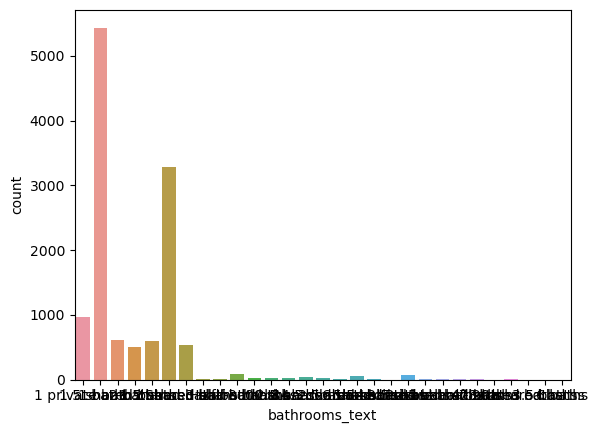

In [49]:
sns.countplot(x = df[df["price"] < 100]["bathrooms_text"])

<AxesSubplot:xlabel='bathrooms_text', ylabel='count'>

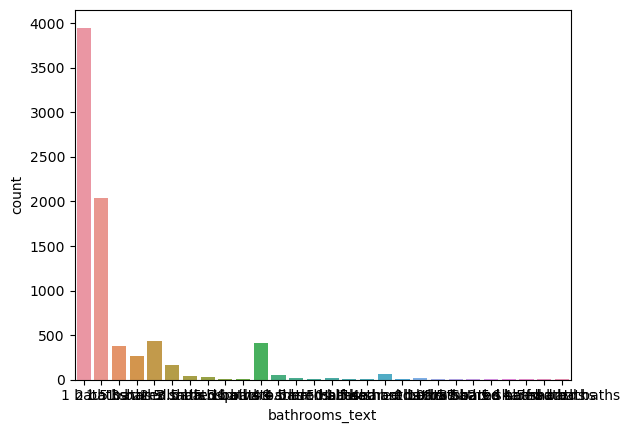

In [50]:
sns.countplot(x = df[df["price"] > 100]["bathrooms_text"])

### Cleaning it and casting into float

In [ ]:

# Get numbers out of bathroom_text columns

df = df[self.df_cleaned["bathrooms_text"].isnull() == False]

l_nums = [re.findall(r'\d+',i) for i in self.df["bathrooms_text"].values]

l_nums_completed = []

for i in l_nums:

    if len(i) > 1:

        l_nums_completed.append('.'.join(i))

    elif len(i) == 0:

        l_nums_completed.append('0')

    else:

        l_nums_completed.append(i[0])

# Create two different columns replacing bathroom_text

self.df_cleaned["bathrooms_text"] = l_nums_completed

df["bathrooms_text"] = df["bathrooms_text"].astype("float64")

## bedrooms

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

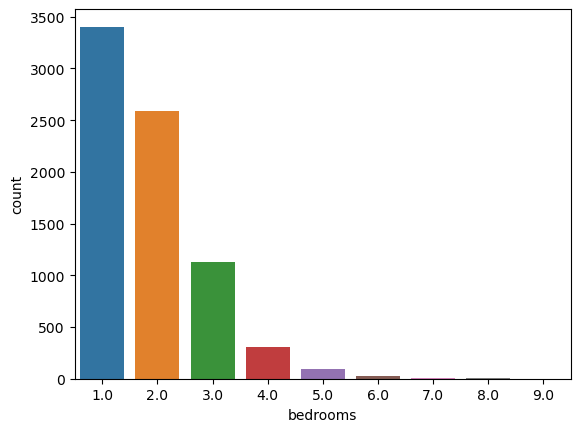

In [51]:
sns.countplot(x = df[df["price"] > 100]["bedrooms"])

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

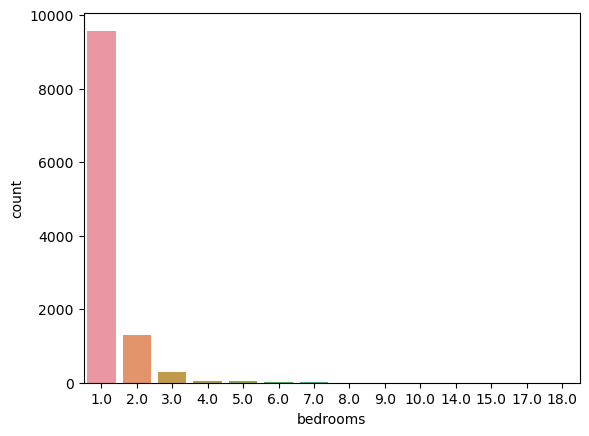

In [52]:
sns.countplot(x = df[df["price"] < 100]["bedrooms"])

## beds

In [53]:
df["beds"].isnull().value_counts()

False    20331
True       350
Name: beds, dtype: int64

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='beds', ylabel='count'>

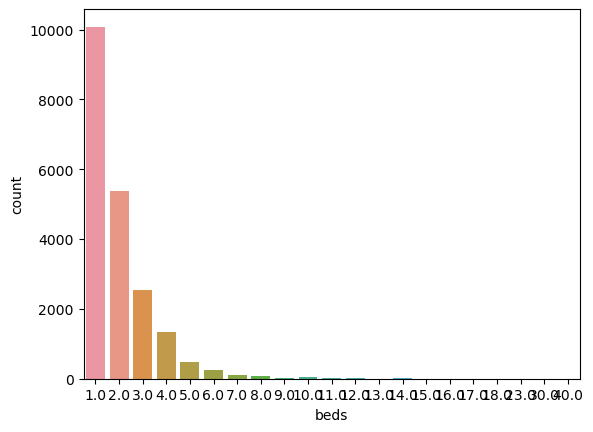

In [54]:
sns.countplot(df["beds"])

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='beds'>

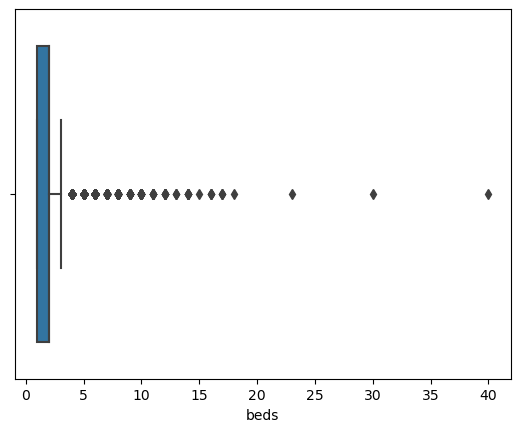

In [55]:
sns.boxplot(df["beds"])

In [56]:
df = df[(df["beds"]<5) &( df["beds"]!= 0)]

In [57]:
df =  df[(df["price"]<1000)]

In [58]:
df.shape

(19123, 78)

In [59]:
df["beds"]

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
20676    3.0
20677    4.0
20678    1.0
20679    3.0
20680    2.0
Name: beds, Length: 19123, dtype: float64

In [60]:
df[df["beds"]<5]["price"]

0         77.0
1         31.0
2         92.0
3         26.0
4         49.0
         ...  
20676     85.0
20677     75.0
20678     50.0
20679    165.0
20680    109.0
Name: price, Length: 19123, dtype: float64

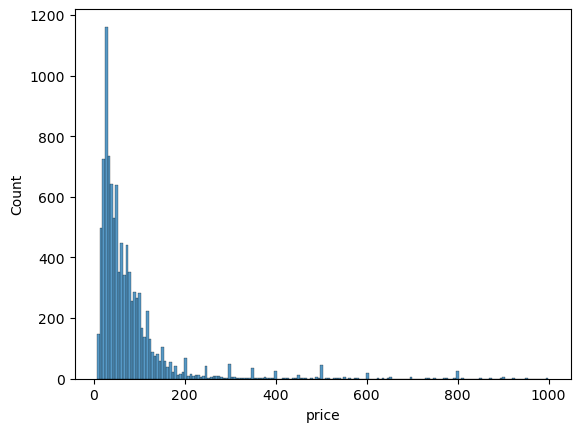

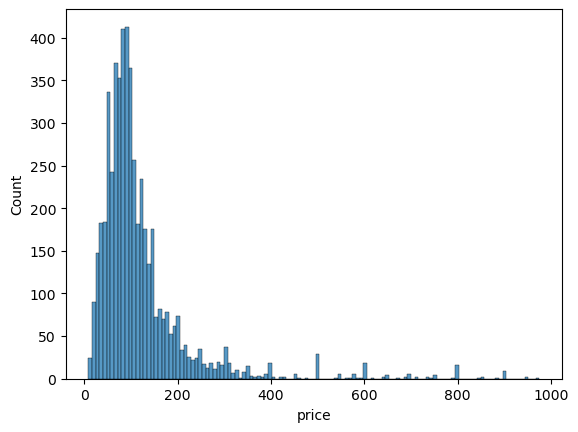

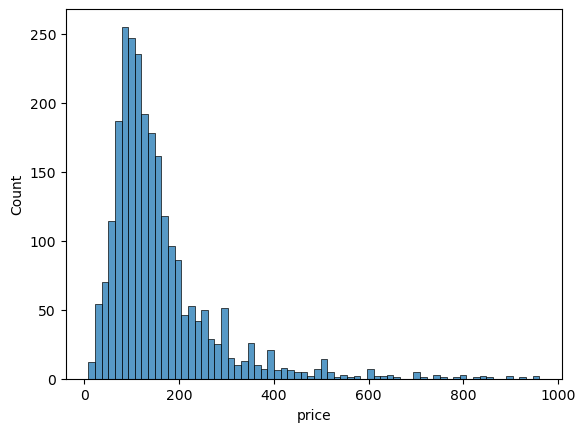

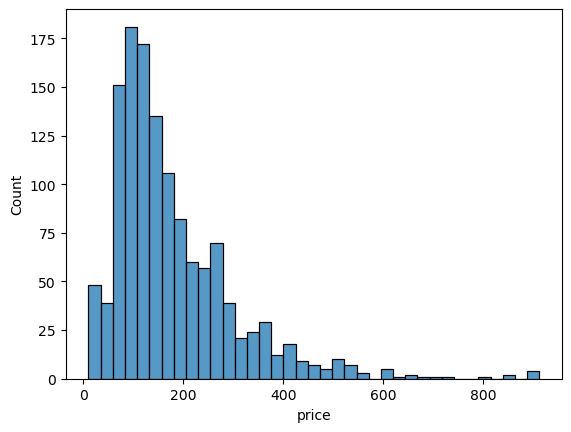

In [61]:
for i in range(1,5):
    sns.histplot(df[df["beds"]==i]["price"])
    plt.show()

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


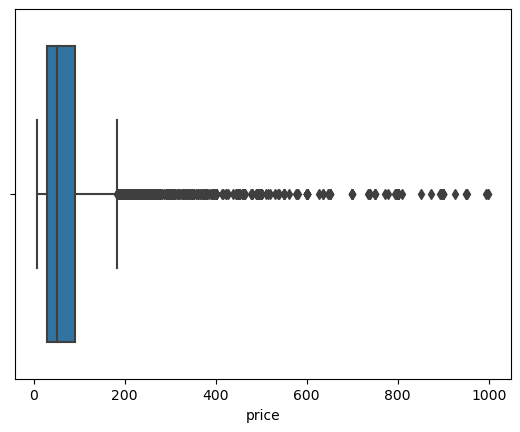

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


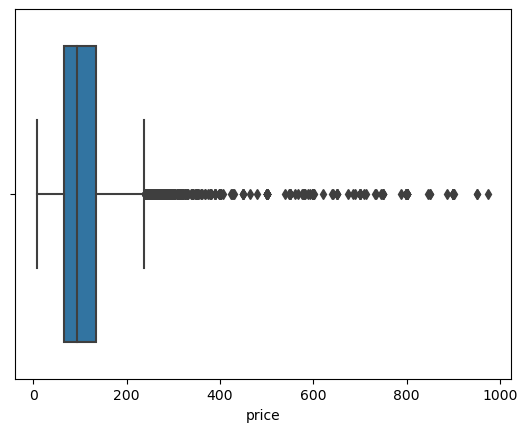

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


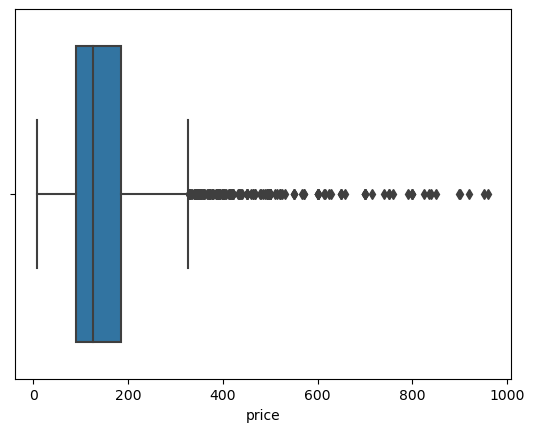

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


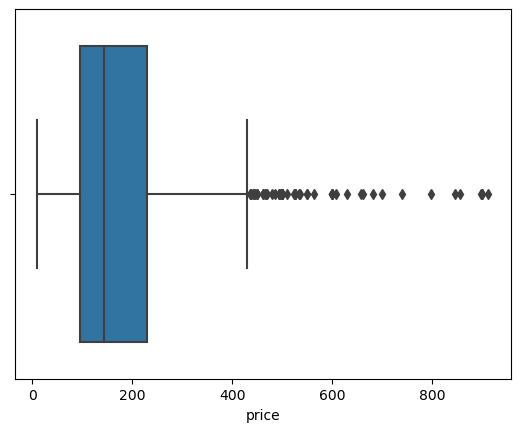

In [62]:
for i in range(1,5):
    sns.boxplot(df[df["beds"]==i]["price"])
    plt.show()

## minimum_nights

In [64]:
df = df[df["minimum_nights"]<8]

<AxesSubplot:xlabel='minimum_nights', ylabel='count'>

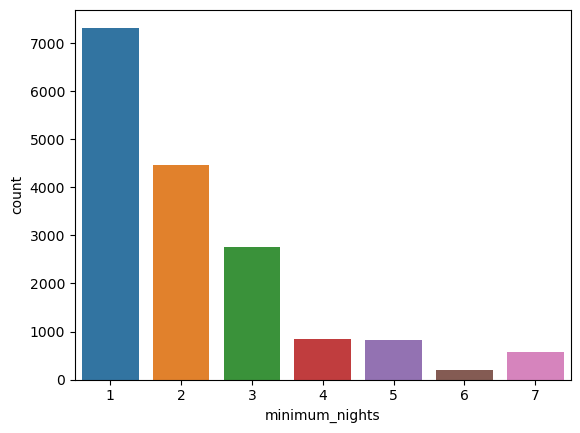

In [65]:
sns.countplot(x = df["minimum_nights"])

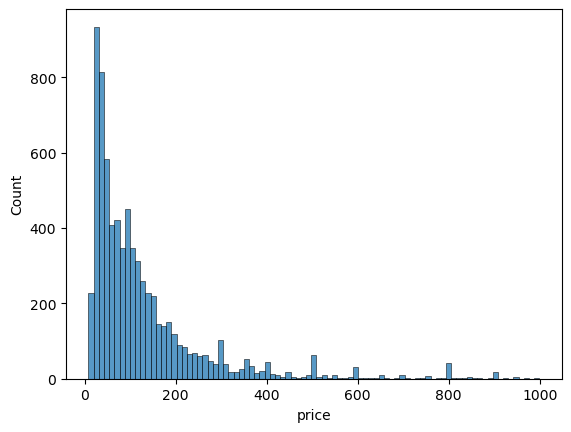

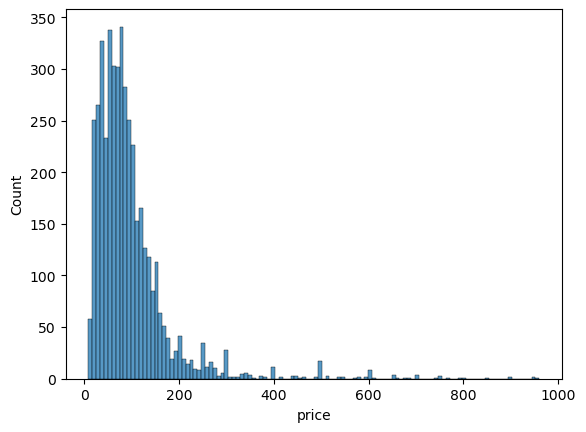

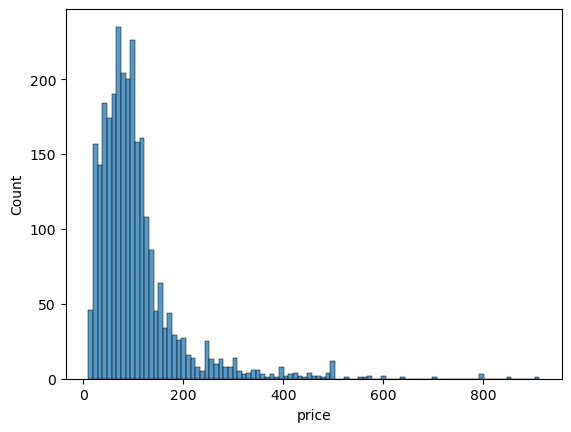

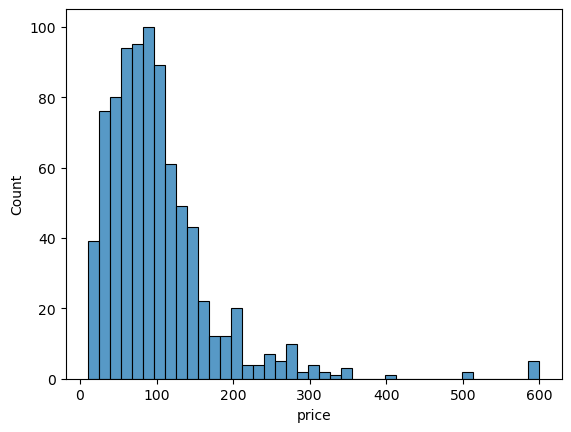

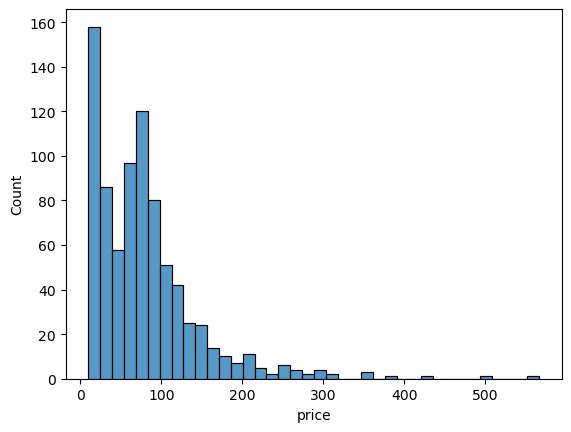

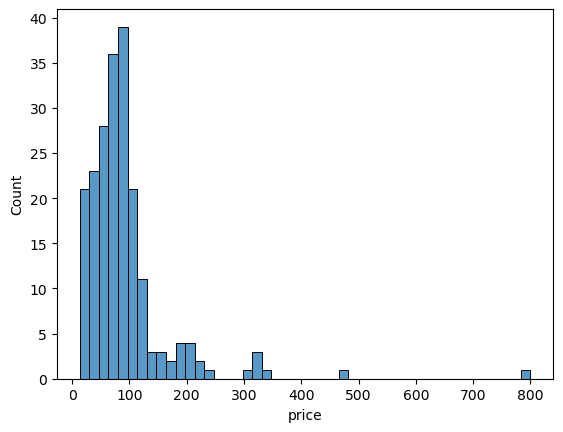

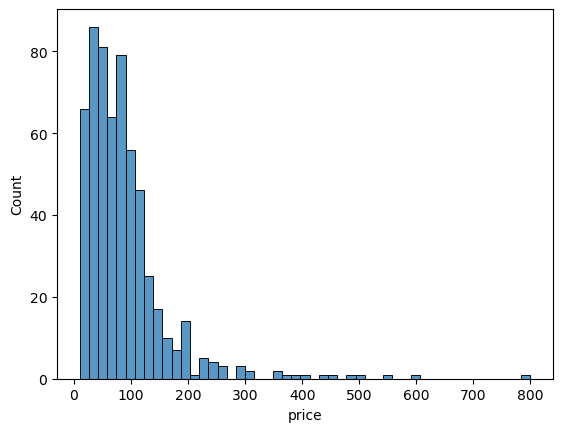

In [66]:
for i in range(1,8):
    sns.histplot(df[df["minimum_nights"]==i]["price"])
    plt.show()

## maximum_nights

In [67]:
df = df[df["maximum_nights"]>500]

In [68]:
df.shape

(8241, 78)

In [69]:
df["maximum_nights"].unique()

array([  1125,   1124,    730,   1000,   1120,    600,   1365,   1123,
          888,  11111,    740,   1121,    720,    999,    619,   1100,
          700,   1091, 142365,    900,   1024,   1001,   1115,   1111],
      dtype=int64)

In [70]:
df["maximum_nights"].value_counts

<bound method IndexOpsMixin.value_counts of 0        1125
2        1125
3        1125
6        1124
7         730
         ... 
20670    1125
20671    1125
20676    1125
20677    1125
20678    1125
Name: maximum_nights, Length: 8241, dtype: int64>

<AxesSubplot:xlabel='maximum_nights', ylabel='count'>

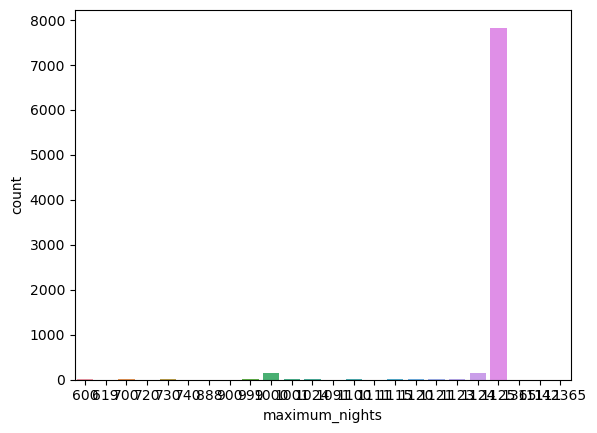

In [71]:
sns.countplot(x = df["maximum_nights"])

<AxesSubplot:xlabel='maximum_nights', ylabel='Density'>

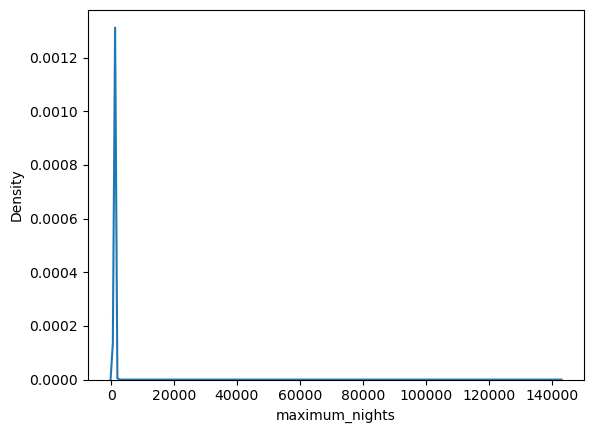

In [72]:
sns.kdeplot(df["maximum_nights"])

## minimum_minimum_nights

In [73]:
df[["minimum_minimum_nights","minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm"]]

,minimum_minimum_nights,minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm
0,3,3,21,1125,1125,5.5,1125.0
2,5,5,5,1125,1125,5.0,1125.0
3,2,2,2,1125,1125,2.0,1125.0
6,6,6,6,1124,1124,6.0,1124.0
7,3,3,3,730,730,3.0,730.0
...,...,...,...,...,...,...,...
20670,2,2,2,1125,1125,2.0,1125.0
20671,1,1,1,1125,1125,1.0,1125.0
20676,1,1,1,1125,1125,1.0,1125.0
20677,7,7,7,1125,1125,7.0,1125.0


In [74]:
df[["availability_30","availability_60", "availability_90" ,"availability_365"]]

,availability_30,availability_60,availability_90,availability_365
0,0,26,56,56
2,1,5,5,80
3,12,34,64,339
6,0,11,41,287
7,0,0,0,0
...,...,...,...,...
20670,2,23,51,122
20671,0,0,0,247
20676,0,0,0,0
20677,0,0,0,224


## Host is superhost

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='host_is_superhost', ylabel='count'>

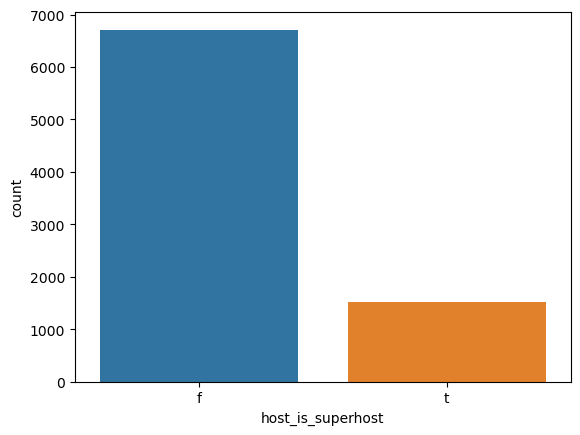

In [75]:
sns.countplot(df["host_is_superhost"])

In [76]:
df["price"]

0         77.0
2         92.0
3         26.0
6         20.0
7         54.0
         ...  
20670    119.0
20671     55.0
20676     85.0
20677     75.0
20678     50.0
Name: price, Length: 8241, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

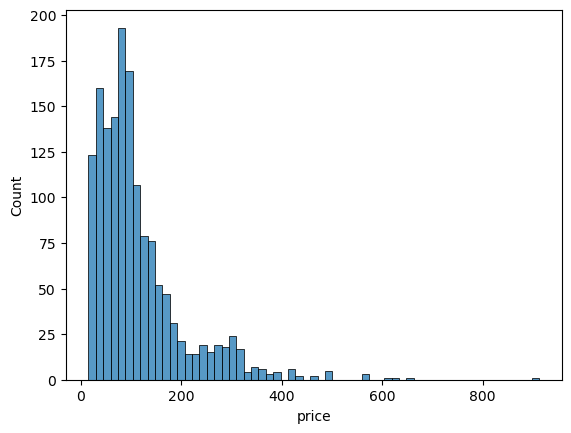

In [77]:
sns.histplot(df[df["host_is_superhost"] == "t"]["price"])

## host_is_superhost

<AxesSubplot:xlabel='price', ylabel='Count'>

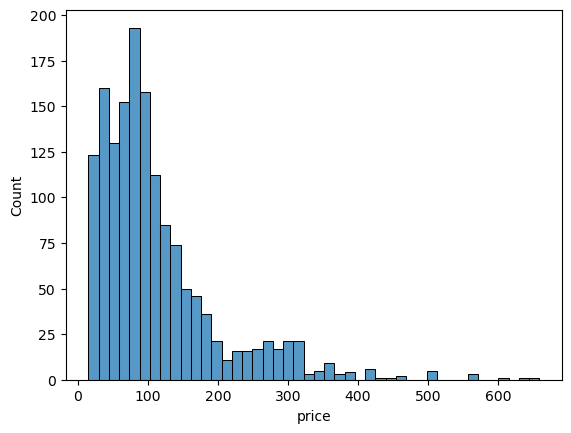

In [84]:
sns.histplot(df[df["host_is_superhost"] == "t"]["price"])

<AxesSubplot:xlabel='price', ylabel='Count'>

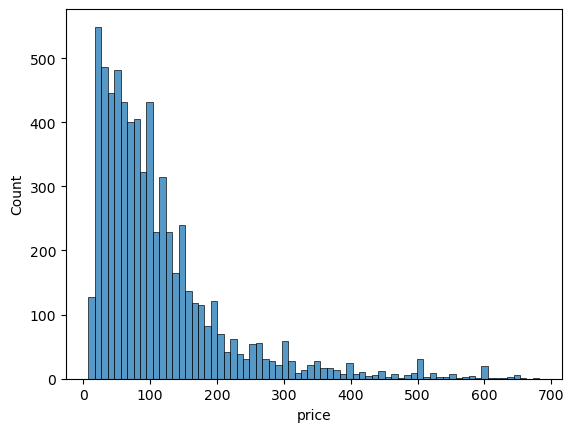

In [85]:
sns.histplot(df[df["host_is_superhost"] == "f"]["price"])

## number_of_reviews

In [86]:
df["number_of_reviews"].isnull().value_counts()

False    8191
Name: number_of_reviews, dtype: int64

In [87]:
df["number_of_reviews"].value_counts()

0      1170
1       567
2       371
3       285
4       213
       ... 
571       1
454       1
366       1
467       1
345       1
Name: number_of_reviews, Length: 414, dtype: int64

In [88]:
df = df[df["number_of_reviews"]<200]

In [89]:
df = df[df["price"]<700]

<AxesSubplot:xlabel='number_of_reviews', ylabel='count'>

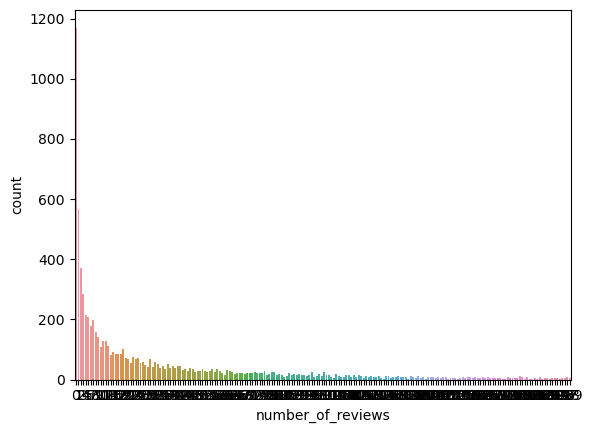

In [90]:
sns.countplot(x = df["number_of_reviews"])

<AxesSubplot:xlabel='number_of_reviews', ylabel='Density'>

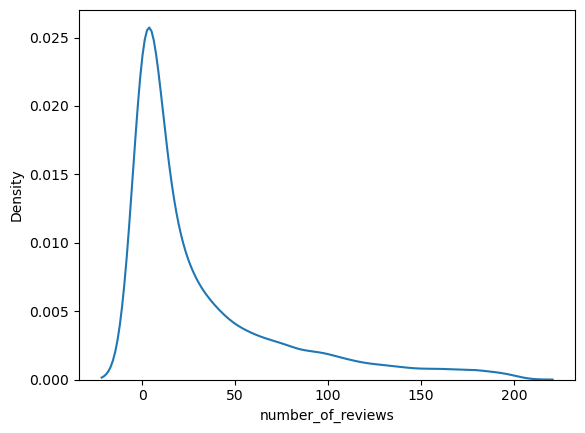

In [91]:
sns.kdeplot(df["number_of_reviews"])

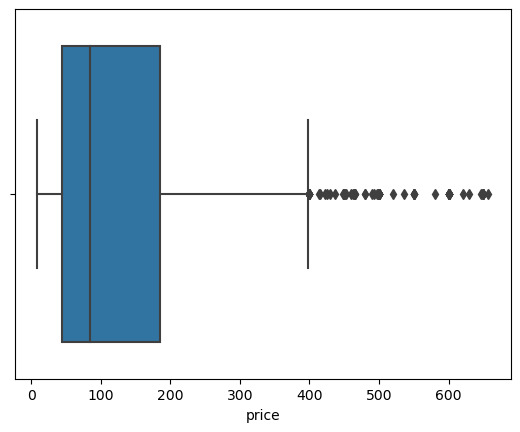

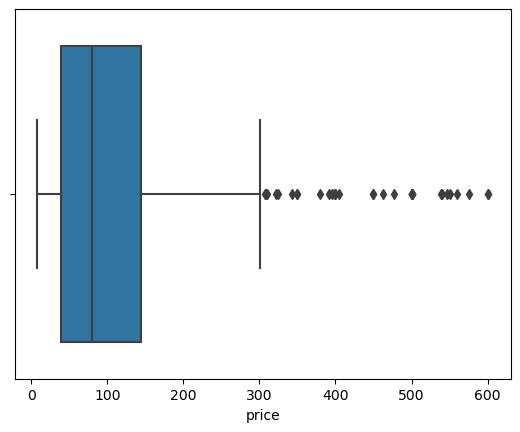

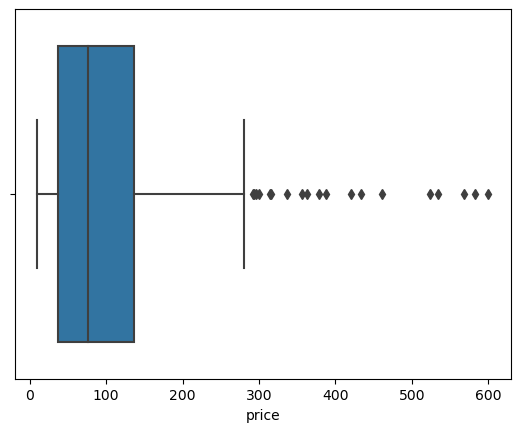

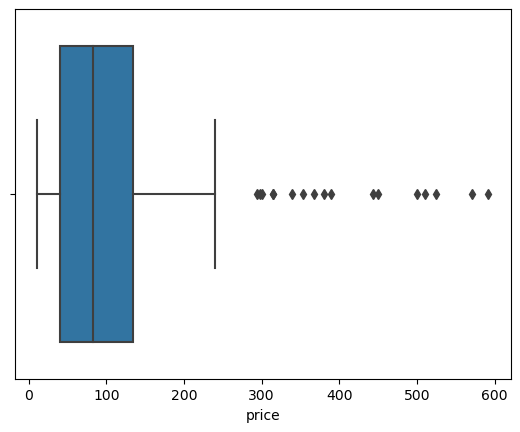

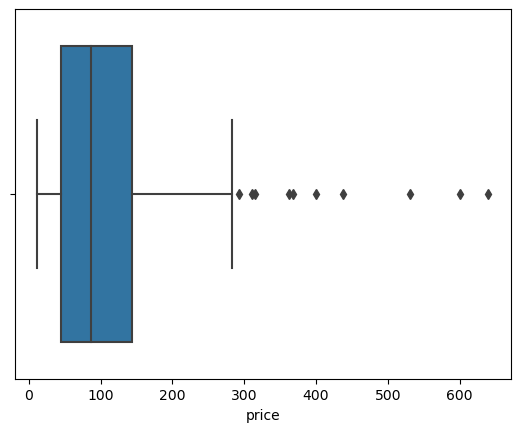

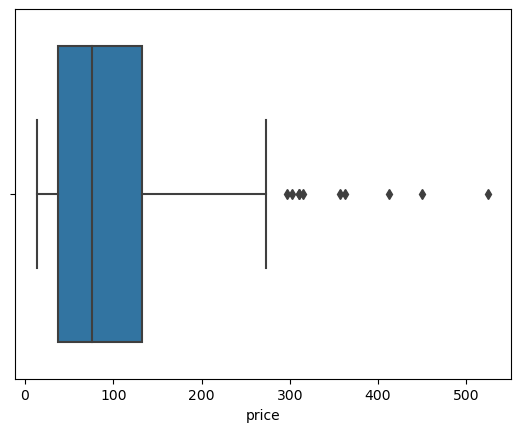

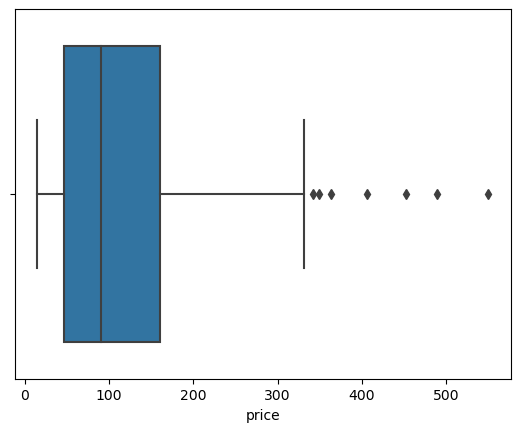

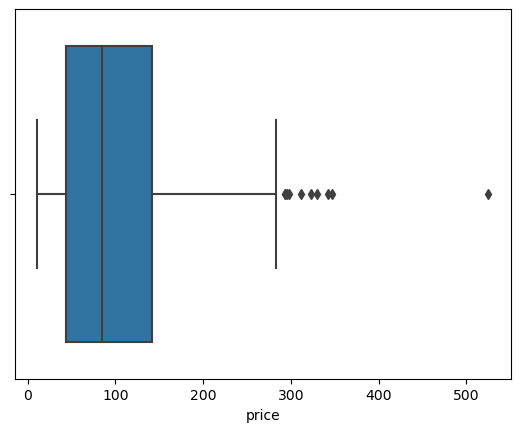

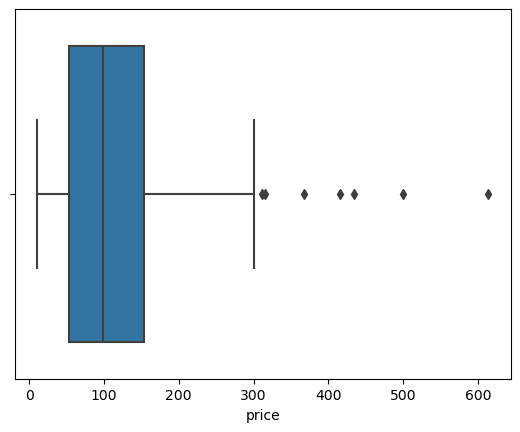

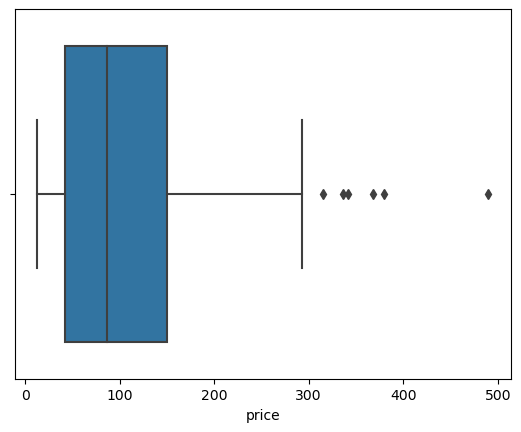

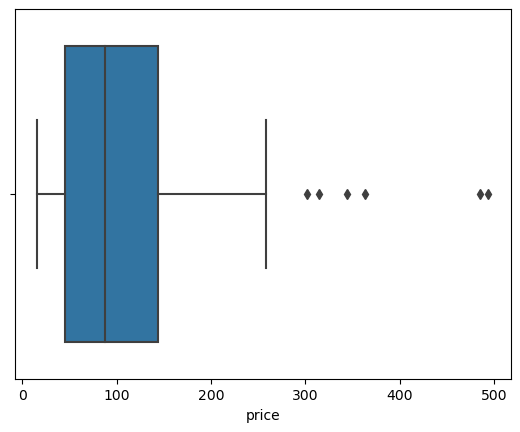

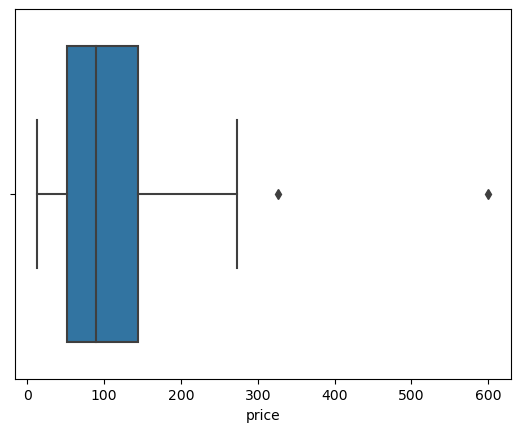

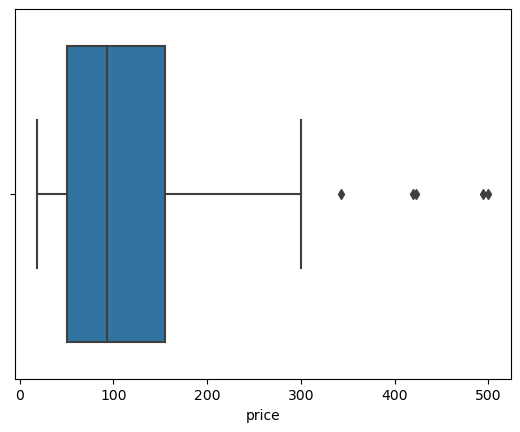

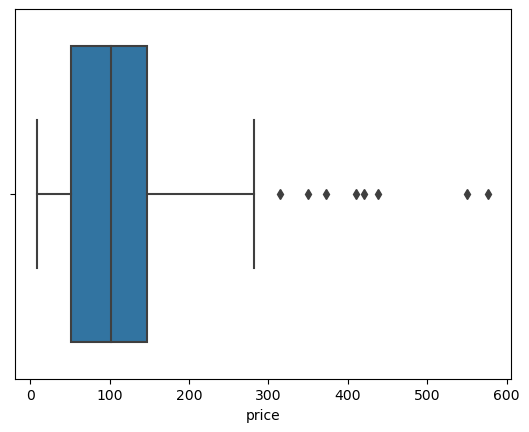

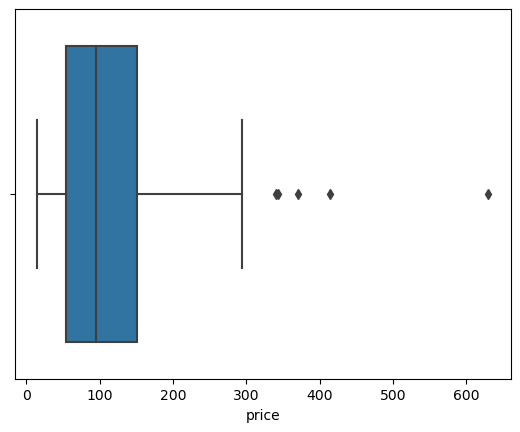

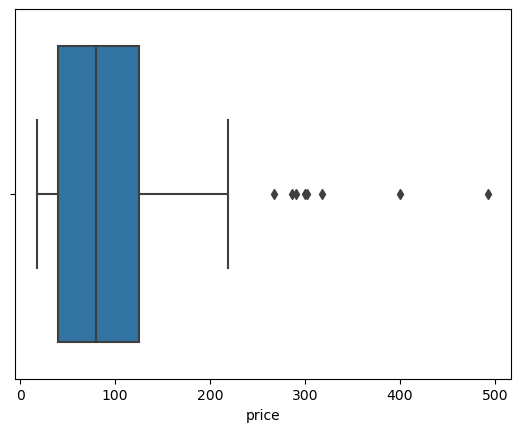

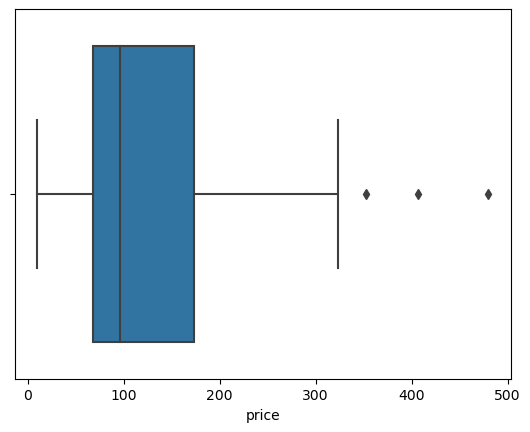

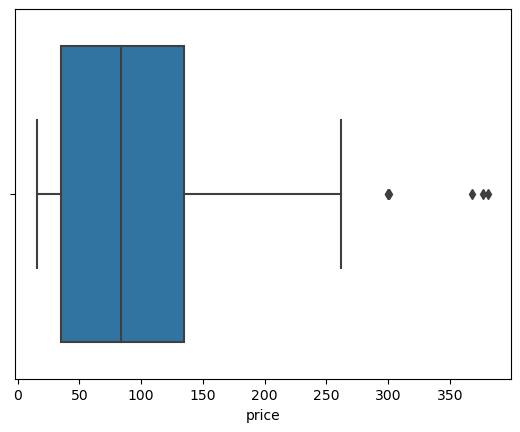

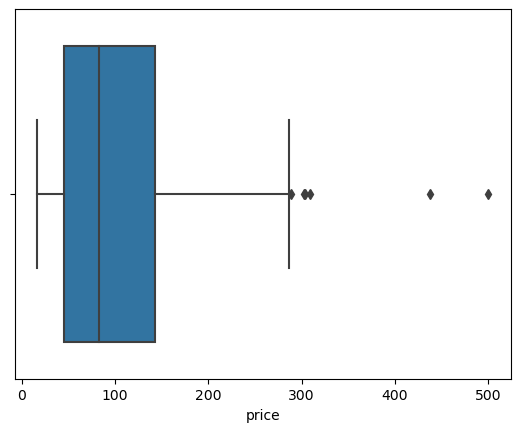

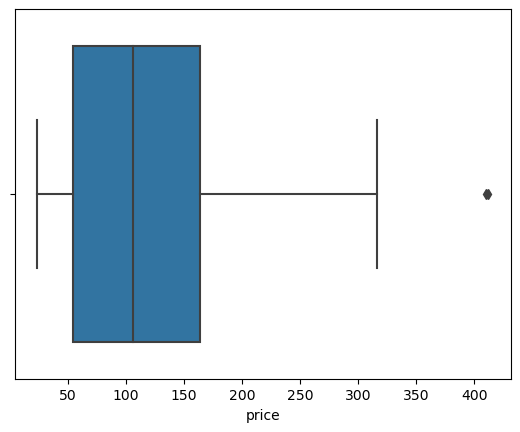

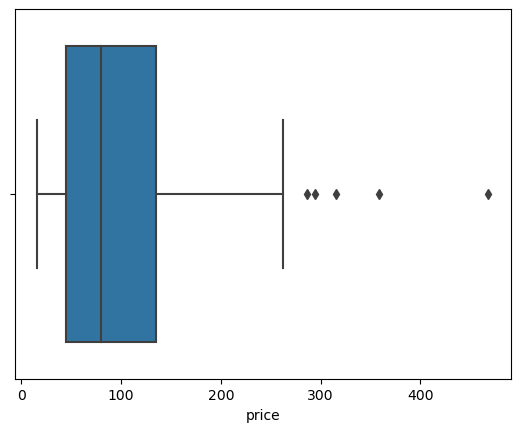

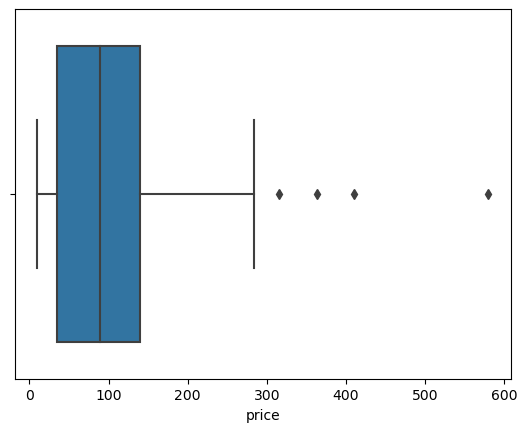

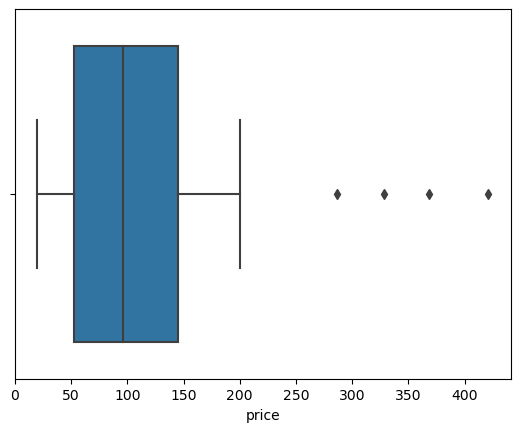

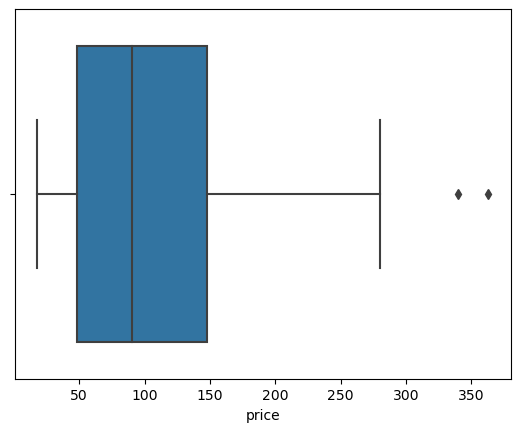

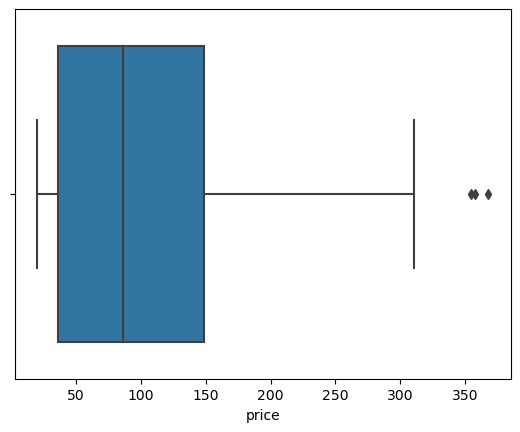

In [92]:
for i in range(0,25):
    sns.boxplot(x = df[df["number_of_reviews"]==i]["price"])
    plt.show()

In [93]:
df_price_per_number_of_reviews = df.groupby(["number_of_reviews"]).mean().price

In [94]:
df_price_per_number_of_reviews

number_of_reviews
0      138.766667
1      110.811287
2      103.404313
3      106.080702
4      108.028169
          ...    
195     74.666667
196    109.000000
197     88.333333
198     88.500000
199     65.250000
Name: price, Length: 200, dtype: float64

In [95]:
df_price_per_number_of_reviews.sort_values(ascending=False)

number_of_reviews
177    245.500000
183    190.000000
174    171.375000
107    169.666667
161    161.571429
          ...    
194     63.800000
170     63.800000
145     57.000000
160     54.400000
188     44.500000
Name: price, Length: 200, dtype: float64

Text(0, 0.5, 'Price')

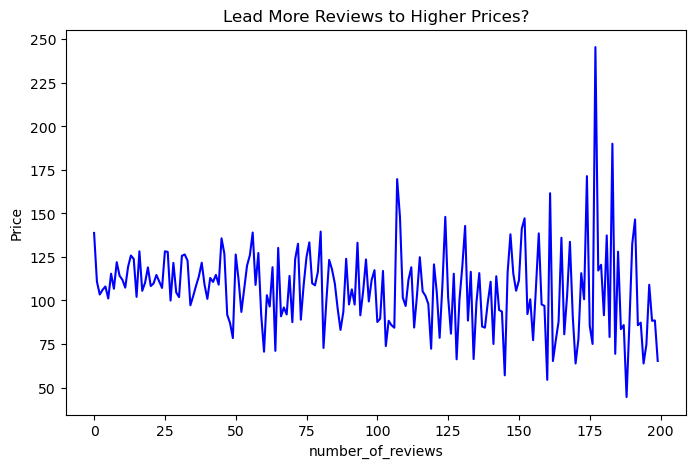

In [96]:
plt.figure(figsize=(8,5))
df_price_per_number_of_reviews.plot(kind="line", color="blue")
plt.title("Lead More Reviews to Higher Prices?")
plt.ylabel("Price")

# Last review

In [97]:
df["last_review"].isnull().value_counts()

False    6557
True     1170
Name: last_review, dtype: int64

# Instant bookable


In [98]:
df["instant_bookable"].value_counts()

t    4301
f    3426
Name: instant_bookable, dtype: int64

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='instant_bookable', ylabel='count'>

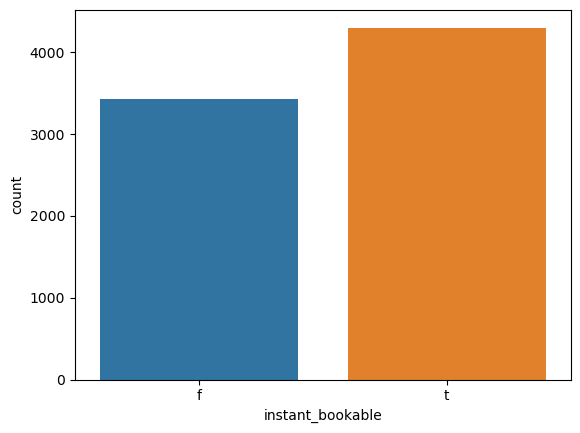

In [99]:
sns.countplot(df["instant_bookable"])

In [100]:
df_instant_boockable = df.groupby(["instant_bookable"]).mean().price

Text(0, 0.5, 'Price')

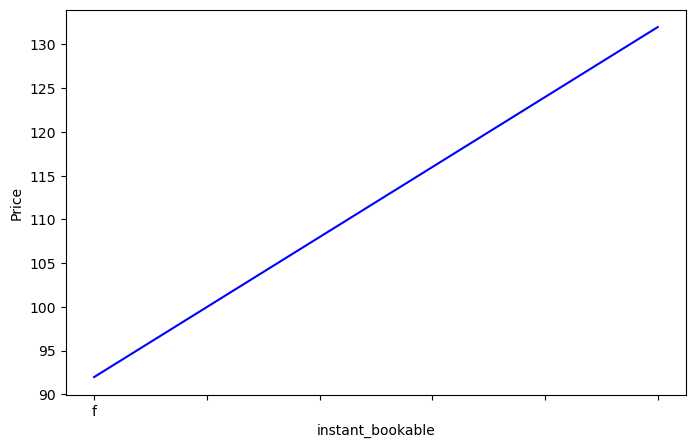

In [101]:
plt.figure(figsize=(8,5))
df_instant_boockable.plot(kind="line", color="blue")
plt.ylabel("Price")

In [102]:
df_instant_boockable

instant_bookable
f     91.963371
t    131.990700
Name: price, dtype: float64

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


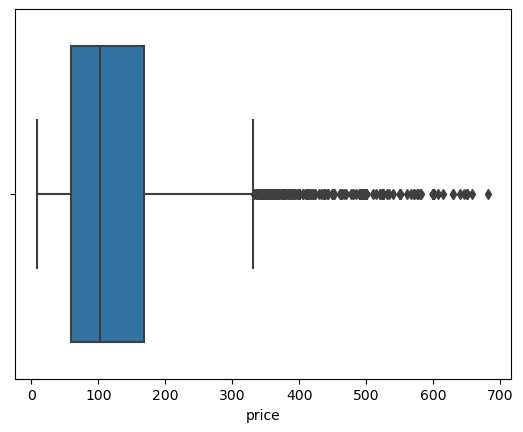

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


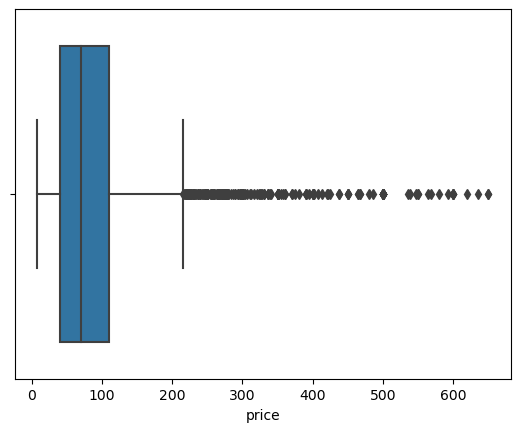

In [103]:
l_instant_boockable = ["t", "f"]
for i in l_instant_boockable:
    sns.boxplot(df[df["instant_bookable"]==i]["price"])
    plt.show()

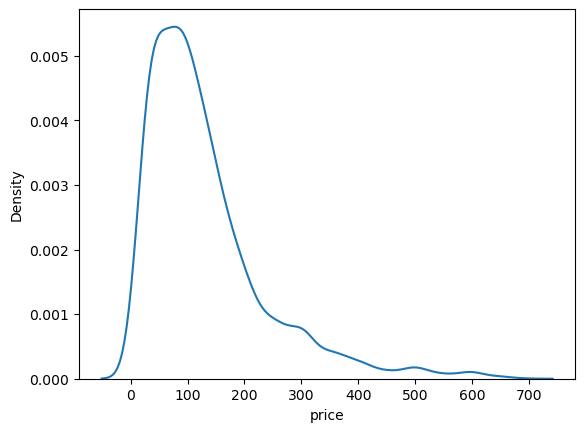

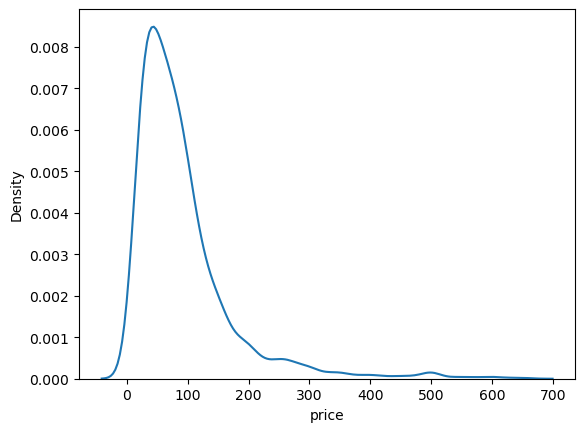

In [104]:
l_instant_boockable = ["t", "f"]
for i in l_instant_boockable:
    sns.kdeplot(df[df["instant_bookable"]==i]["price"])
    plt.show()

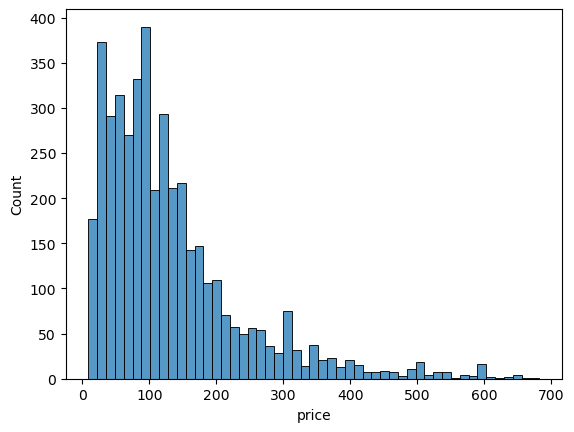

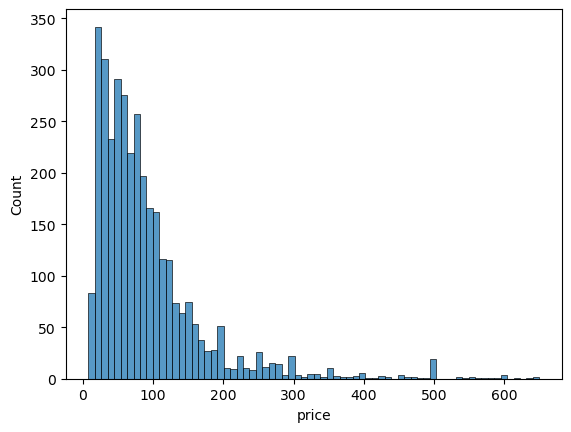

In [105]:
l_instant_boockable = ["t", "f"]
for i in l_instant_boockable:
    sns.histplot(df[df["instant_bookable"]==i]["price"])
    plt.show()

# calculated_host_listings_count

In [106]:
sorted(df["calculated_host_listings_count"].unique())

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 33,
 34,
 35,
 36,
 43,
 44,
 49,
 52,
 56,
 60,
 61,
 62,
 64,
 65,
 72,
 74,
 80,
 90,
 96,
 102,
 132,
 240]

<AxesSubplot:xlabel='calculated_host_listings_count', ylabel='count'>

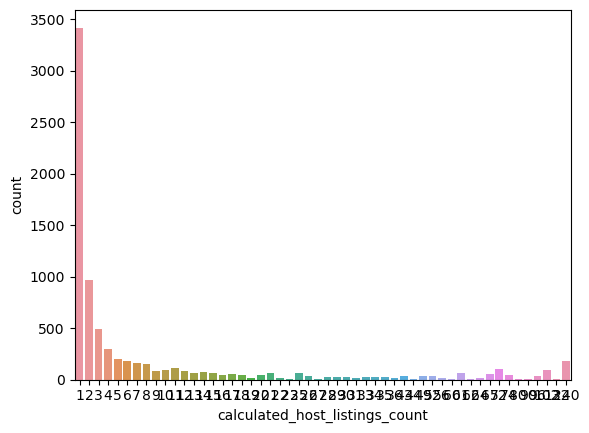

In [107]:
sns.countplot(x = df["calculated_host_listings_count"])

In [108]:
df_calculated_host_listings_count = df.groupby("calculated_host_listings_count").mean().price

Text(0, 0.5, 'Price')

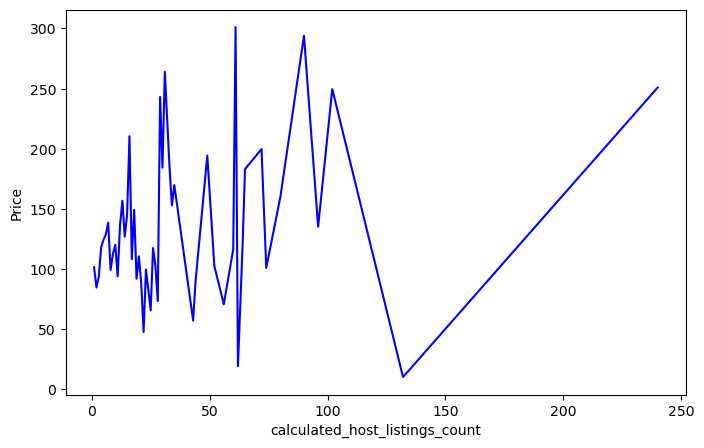

In [109]:
plt.figure(figsize=(8,5))
df_calculated_host_listings_count.plot(kind="line", color="blue")
plt.ylabel("Price")

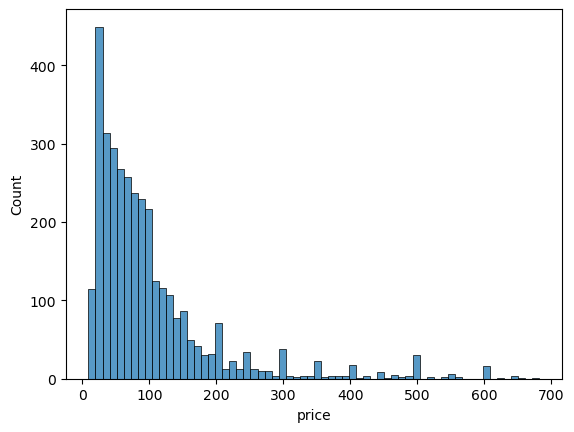

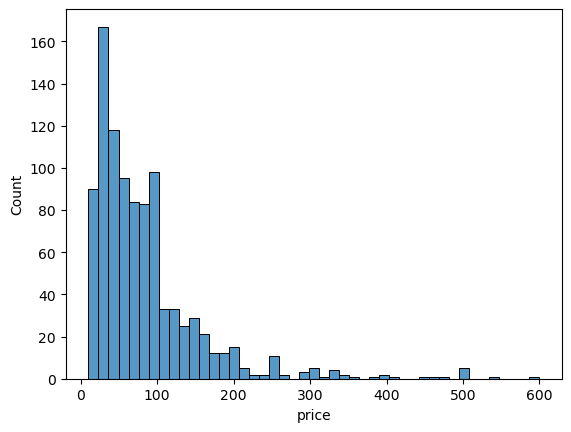

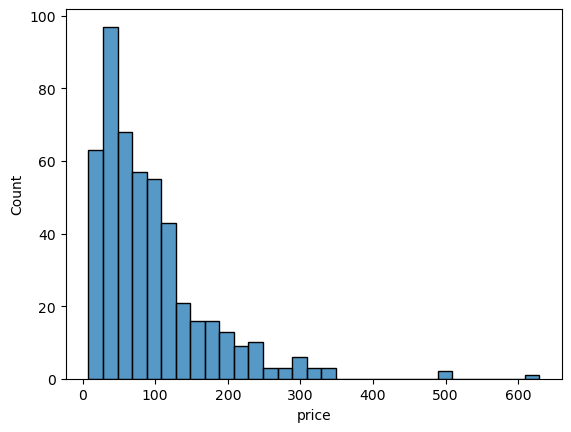

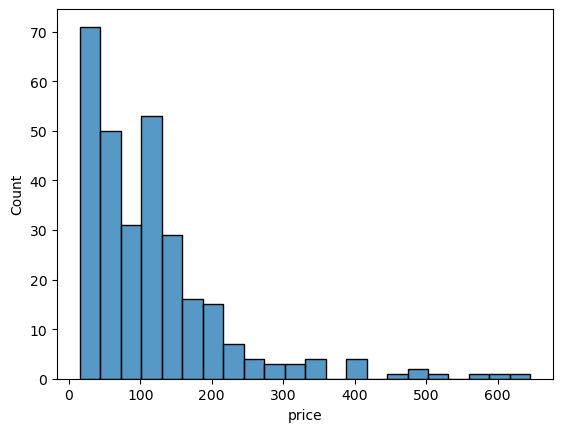

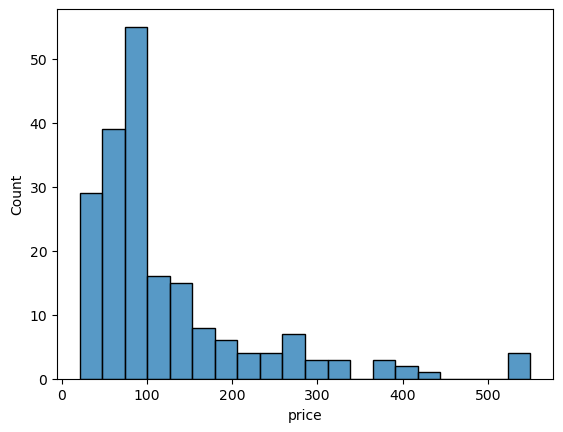

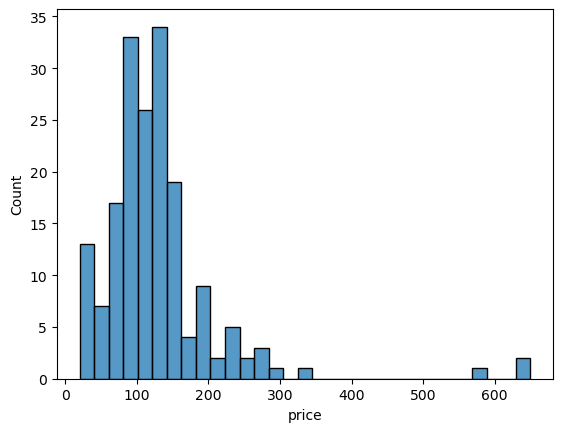

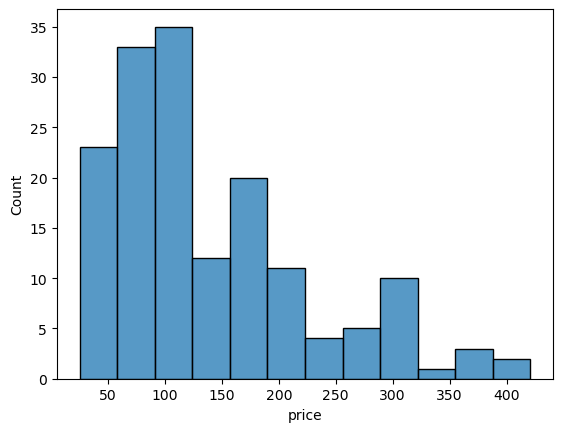

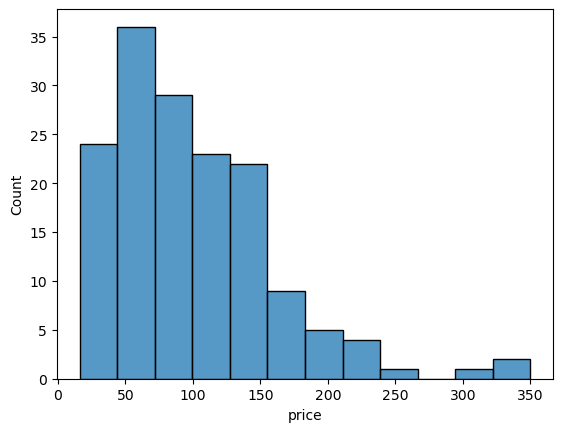

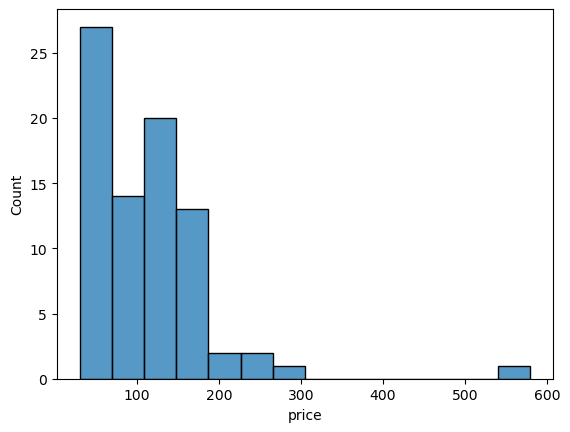

In [110]:
for i in range(1, 10):
    sns.histplot(df[df["calculated_host_listings_count"]==i]["price"])
    plt.show()

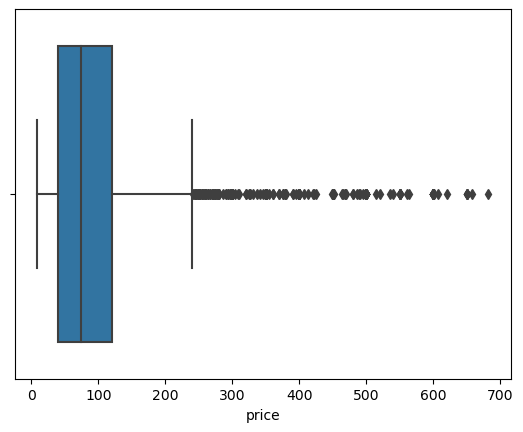

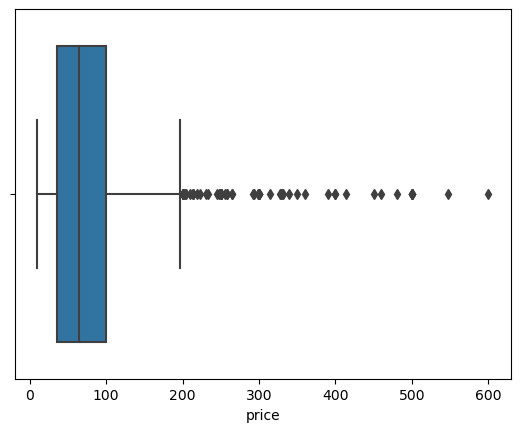

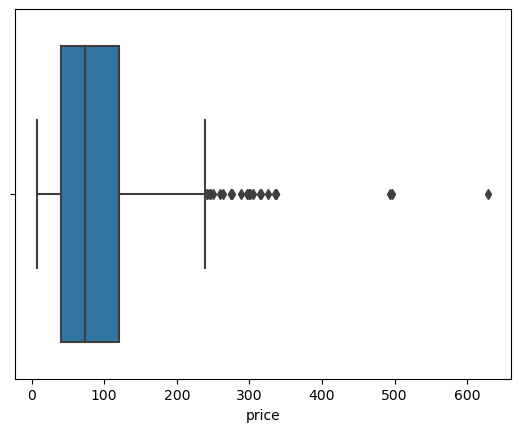

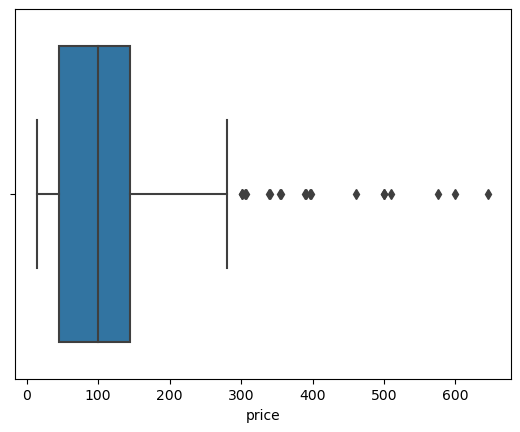

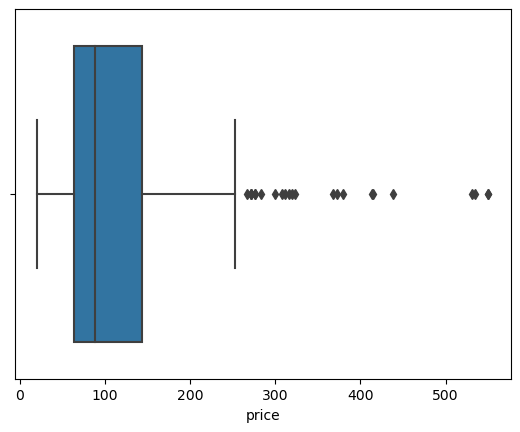

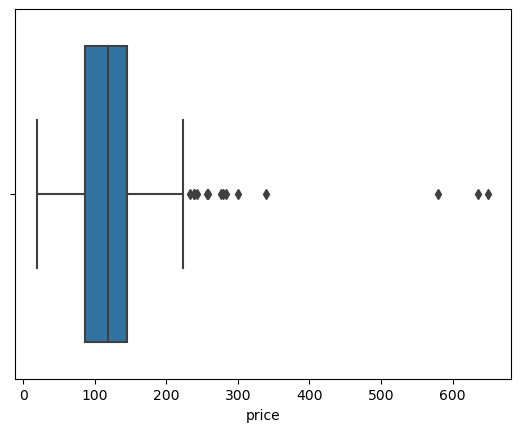

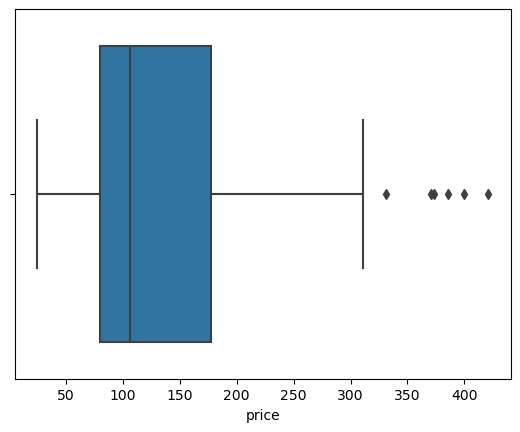

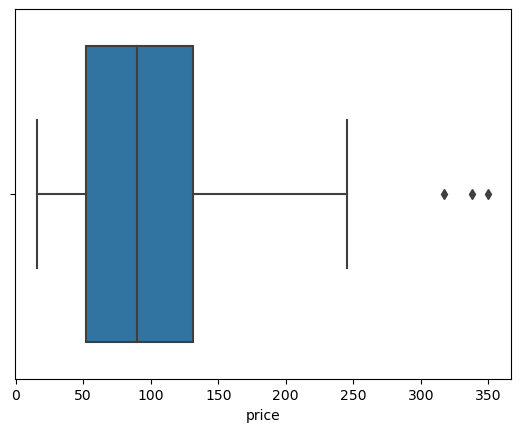

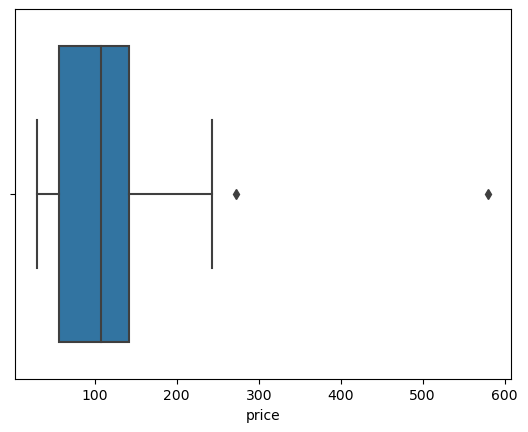

In [111]:
for i in range(1, 10):
    sns.boxplot(x = df[df["calculated_host_listings_count"]==i]["price"])
    plt.show()

In [112]:
df_calculated_host_listings_count

calculated_host_listings_count
1      101.379714
2       84.511892
3       93.644172
4      117.875421
5      124.336683
6      128.698324
7      138.553459
8       99.134615
9      112.612500
10     120.022472
11      93.763636
12     136.325581
13     156.692308
14     126.753467
15     145.268657
16     210.348837
17     108.096154
18     149.175000
19      91.750000
20     110.390244
21      87.781250
22      47.470588
23      99.500000
25      65.492063
26     117.411765
27     102.600000
28      73.250000
29     243.047619
30     184.217391
31     264.000000
33     184.038462
34     152.809524
35     169.739130
36     155.866667
43      56.966667
44      89.000000
49     194.256410
52     102.366667
56      70.611111
60     116.333333
61     301.163934
62      19.000000
64     121.157895
65     183.018519
72     199.676471
74     100.816327
80     160.000000
90     294.000000
96     135.114286
102    249.563830
132     10.000000
240    250.910615
Name: price, dtype: float64

# reviews_per_month

In [113]:
df["reviews_per_month"].isnull().value_counts()

False    6557
True     1170
Name: reviews_per_month, dtype: int64

In [114]:
df["reviews_per_month"].unique()

array([6.500e-01, 2.500e-01, 1.100e+00, 5.000e-02, 9.000e-02, 7.900e-01,
       1.350e+00, 1.000e-01, 3.000e-02, 3.200e-01, 2.020e+00, 1.100e-01,
       7.000e-01, 3.400e-01, 9.700e-01, 2.000e-01, 2.100e-01, 2.900e-01,
       3.300e-01, 1.400e-01, 1.700e-01, 1.640e+00, 1.470e+00, 1.000e-02,
       1.900e-01, 1.770e+00, 2.600e-01, 1.950e+00, 8.500e-01, 1.650e+00,
       1.120e+00, 3.900e-01,       nan, 8.300e-01, 1.380e+00, 1.500e-01,
       2.800e-01, 6.000e-01, 1.200e-01, 5.900e-01, 8.000e-02, 4.000e-02,
       3.100e-01, 4.400e-01, 1.030e+00, 6.300e-01, 6.400e-01, 4.900e-01,
       8.700e-01, 1.600e+00, 4.300e-01, 3.500e-01, 1.630e+00, 6.800e-01,
       1.800e-01, 7.200e-01, 9.000e-01, 1.160e+00, 4.000e-01, 1.130e+00,
       5.200e-01, 1.040e+00, 1.570e+00, 1.790e+00, 2.200e-01, 5.800e-01,
       2.000e-02, 3.000e-01, 1.300e-01, 1.300e+00, 6.200e-01, 9.900e-01,
       7.800e-01, 4.600e-01, 4.700e-01, 6.000e-02, 5.500e-01, 1.220e+00,
       1.020e+00, 8.600e-01, 1.560e+00, 2.400e-01, 

<AxesSubplot:xlabel='reviews_per_month', ylabel='count'>

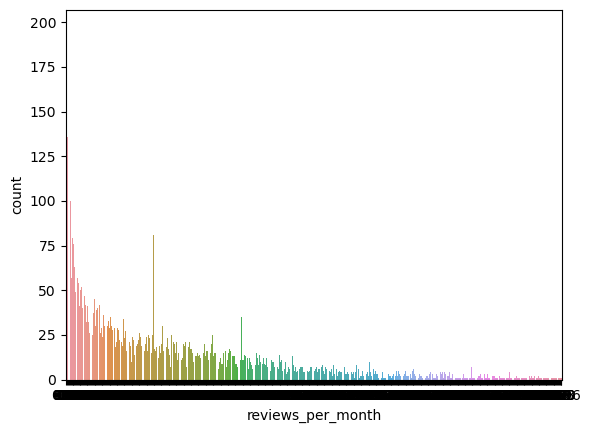

In [115]:
sns.countplot(x = df["reviews_per_month"])

In [116]:
df_reviews_per_month = df.groupby("reviews_per_month").mean().price

In [117]:
df_reviews_per_month

reviews_per_month
0.01      54.793103
0.02      82.750000
0.03     107.649746
0.04      99.479452
0.05      85.414634
            ...    
9.61      44.000000
9.66     101.000000
9.83      54.000000
10.00     37.000000
10.96     44.000000
Name: price, Length: 563, dtype: float64

Text(0, 0.5, 'Price')

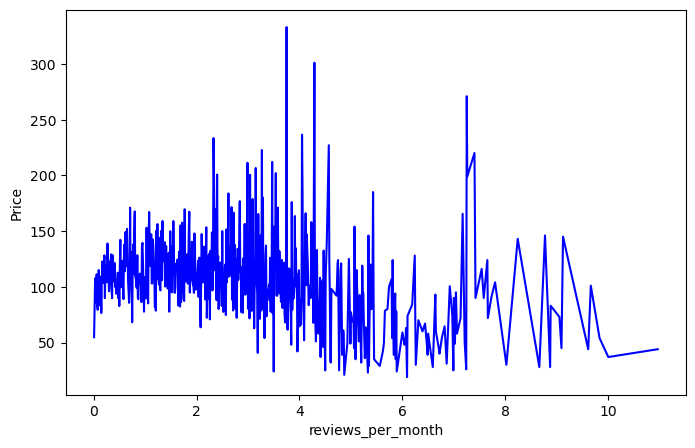

In [118]:
plt.figure(figsize=(8,5))
df_reviews_per_month.plot(kind="line", color="blue")
plt.ylabel("Price")

In [119]:
df_reviews_per_month.index

Float64Index([ 0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,  0.09,
                0.1,
              ...
               8.87,  8.88,  9.05,  9.09,  9.12,  9.61,  9.66,  9.83,  10.0,
              10.96],
             dtype='float64', name='reviews_per_month', length=563)

<AxesSubplot:xlabel='reviews_per_month'>

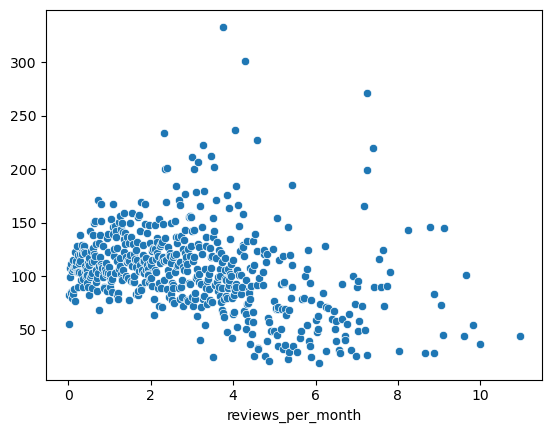

In [120]:
sns.scatterplot(x=df_reviews_per_month.index, y = df_reviews_per_month.values)

# host_id 

In [121]:
df["host_id"]

0            13660
2        346366726
3           114340
6           130502
7           132883
           ...    
20670    315466321
20671     10072682
20676     17074819
20677     30696902
20678     63883696
Name: host_id, Length: 7727, dtype: int64

In [122]:
df_host_id = df.groupby("host_id").mean().price

In [123]:
df_host_id.sort_values()

host_id
108022834      9.0
174571535      9.0
11060534       9.0
146506665      9.0
135189907     10.0
             ...  
33710002     650.0
260816854    650.0
262539665    650.0
222853120    657.0
387918162    682.0
Name: price, Length: 4783, dtype: float64

<AxesSubplot:xlabel='host_id'>

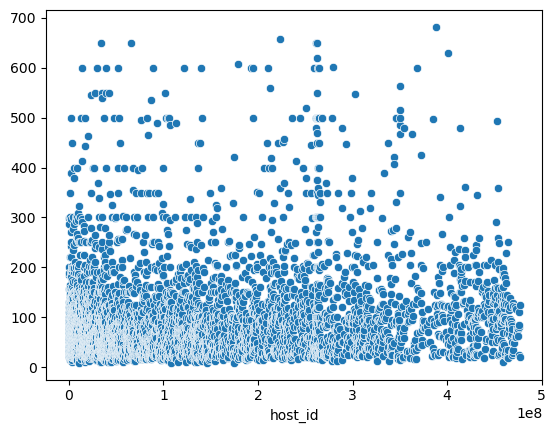

In [124]:
sns.scatterplot(x=df_host_id.index, y = df_host_id.values)

Text(0, 0.5, 'Price')

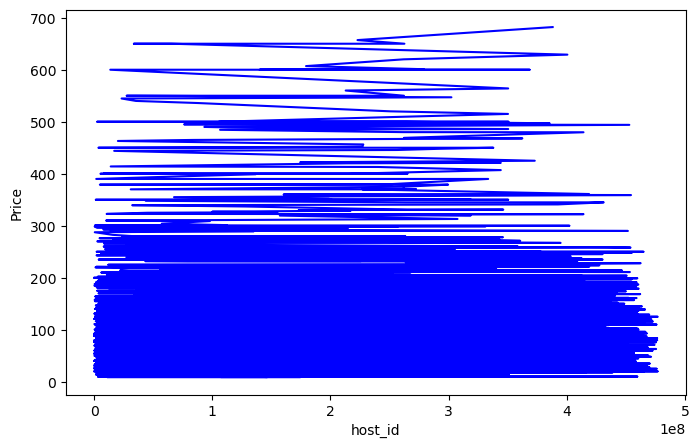

In [125]:
plt.figure(figsize=(8,5))
df_host_id.sort_values().plot(kind="line", color="blue")
plt.ylabel("Price")

In [126]:
df_host_id.sort_values

<bound method Series.sort_values of host_id
13660         77.0
17453        200.0
31622         31.0
53526         88.0
67353         92.0
             ...  
475820988     25.0
476330270     80.0
476338149     84.0
476682301     20.0
476827596    125.0
Name: price, Length: 4783, dtype: float64>

# Amenities

In [63]:
df["amenities"]

0        ["Coffee maker", "Dishwasher", "Cleaning produ...
1        ["Wifi", "Coffee maker", "Bed linens", "Washer...
2        ["Wifi", "Coffee maker", "Washer", "Cleaning b...
3        ["Wifi", "Hot water", "Long term stays allowed...
4        ["Portable air conditioning", "Wifi", "Hot wat...
                               ...                        
20676    ["Wifi", "Coffee maker", "Dishwasher", "Cleani...
20677    ["Wifi", "Coffee maker", "Bed linens", "Washer...
20678    ["Wifi", "Long term stays allowed", "Elevator"...
20679    ["Free parking garage on premises \u2013 1 spa...
20680    ["Wifi", "Long term stays allowed", "Security ...
Name: amenities, Length: 19123, dtype: object

### Option 1 Get the 20 most comun and then the 10 more related to price

In [127]:
df["amenities"][0]

'["Coffee maker", "Dishwasher", "Cleaning products", "Bed linens", "Toaster", "Fast wifi \\u2013 274 Mbps", "Central heating", "Ceiling fan", "Dishes and silverware", "Shampoo", "Luggage dropoff allowed", "Hot water", "Shared patio or balcony", "Long term stays allowed", "Wine glasses", "Clothing storage: closet", "Freezer", "Elevator", "Hair dryer", "Hot water kettle", "Paid street parking off premises", "Free washer \\u2013 In unit", "Body soap", "Oven", "Cooking basics", "Outdoor furniture", "Dedicated workspace", "Hangers", "Extra pillows and blankets", "Microwave", "AC - split type ductless system", "Kitchen", "Rice maker", "Essentials", "Iron", "Pocket wifi", "Refrigerator"]'

In [128]:
import json

l_amenities_cleaned = list()

for i in df["amenities"]:
    
    l_amenities_cleaned.append(json.loads(i))

In [129]:
l_amenities_cleaned

[['Coffee maker',
  'Dishwasher',
  'Cleaning products',
  'Bed linens',
  'Toaster',
  'Fast wifi – 274 Mbps',
  'Central heating',
  'Ceiling fan',
  'Dishes and silverware',
  'Shampoo',
  'Luggage dropoff allowed',
  'Hot water',
  'Shared patio or balcony',
  'Long term stays allowed',
  'Wine glasses',
  'Clothing storage: closet',
  'Freezer',
  'Elevator',
  'Hair dryer',
  'Hot water kettle',
  'Paid street parking off premises',
  'Free washer – In unit',
  'Body soap',
  'Oven',
  'Cooking basics',
  'Outdoor furniture',
  'Dedicated workspace',
  'Hangers',
  'Extra pillows and blankets',
  'Microwave',
  'AC - split type ductless system',
  'Kitchen',
  'Rice maker',
  'Essentials',
  'Iron',
  'Pocket wifi',
  'Refrigerator'],
 ['Wifi',
  'Coffee maker',
  'Washer',
  'Cleaning before checkout',
  'Dishes and silverware',
  'Heating',
  'Shampoo',
  'Luggage dropoff allowed',
  'Hot water',
  'Long term stays allowed',
  'Elevator',
  'TV',
  'Hair dryer',
  'Paid parking

In [130]:
s_amenities_unique = set()

for i in l_amenities_cleaned:
    for j in i:
        s_amenities_unique.add(j)

In [131]:
s_amenities_unique

{'Fast wifi – 113 Mbps',
 'Refrigerator',
 'Nivea shampoo',
 'Safe',
 'Clamp on table seat high chair - always at the listing',
 'STANDAR refrigerator',
 'Mashall Bluetooth sound system',
 'Fast wifi – 246 Mbps',
 'Babaria body soap',
 'Fast wifi – 275 Mbps',
 'Pour-over coffee',
 'Free dryer – In unit',
 'Marshall Bluetooth sound system',
 'Wifi – 33 Mbps',
 'HDTV with Amazon Prime Video, Netflix, standard cable',
 'La Toja body soap',
 'Fast wifi – 505 Mbps',
 'Variado  shampoo',
 'Fast wifi – 319 Mbps',
 'Ceiling fan',
 'DOS PUERTAS CON CONGELADOR refrigerator',
 'Shared outdoor pool - available seasonally, open specific hours, heated',
 'General  body soap',
 '55" HDTV with Chromecast, standard cable',
 'Junto con el chmpu  conditioner',
 'Candy  stove',
 'Gel de Ducha body soap',
 '42" TV with standard cable',
 '42" HDTV with Apple TV, Netflix, Amazon Prime Video',
 'Fast wifi – 289 Mbps',
 'Fast wifi – 53 Mbps',
 'Fast wifi – 131 Mbps',
 'Fast wifi – 627 Mbps',
 'TV with ',
 'Hig

In [132]:
d_contador = {i:0 for i in s_amenities_unique}
for i in l_amenities_cleaned:
    for j in i:
        d_contador[j] = d_contador[j] + 1

In [133]:

l_sorted_amenities = list(sorted(d_contador.items(), key=lambda item: item[1]))
l_sorted_amenities = l_sorted_amenities[::-1]
l_sorted_amenities[:20]

[('Long term stays allowed', 7682),
 ('Wifi', 7129),
 ('Essentials', 7039),
 ('Kitchen', 6921),
 ('Heating', 6276),
 ('Hangers', 6082),
 ('Hair dryer', 5977),
 ('Iron', 5928),
 ('Washer', 5342),
 ('Shampoo', 5182),
 ('Hot water', 5174),
 ('TV', 5005),
 ('Dishes and silverware', 4996),
 ('Refrigerator', 4730),
 ('Coffee maker', 4515),
 ('Microwave', 4469),
 ('Cooking basics', 4303),
 ('Air conditioning', 4267),
 ('Bed linens', 4116),
 ('Elevator', 4110)]

In [134]:
df_amenities = pd.DataFrame()

for j in l_sorted_amenities[:20]:
    
    df_amenities[j[0]] = [1 if j[0] in i else 0 for i in l_amenities_cleaned]

df_amenities

,Long term stays allowed,Wifi,Essentials,Kitchen,Heating,Hangers,Hair dryer,Iron,Washer,Shampoo,Hot water,TV,Dishes and silverware,Refrigerator,Coffee maker,Microwave,Cooking basics,Air conditioning,Bed linens,Elevator
0,1,0,1,1,0,1,1,1,0,1,1,0,1,1,1,1,1,0,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1
2,1,1,1,0,1,1,1,0,0,1,1,0,1,1,0,0,0,0,1,1
3,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7722,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0
7723,1,0,1,0,1,1,1,1,1,0,1,0,1,0,0,1,1,0,1,1
7724,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,0,1,0
7725,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,0


In [135]:
df = pd.concat([df, df_amenities], axis = 1)

In [136]:
df

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,Hot water,TV,Dishes and silverware,Refrigerator,Coffee maker,Microwave,Cooking basics,Air conditioning,Bed linens,Elevator
0,6369.0,https://www.airbnb.com/rooms/6369,2.022091e+13,2022-09-12,city scrape,"Rooftop terrace room , ensuite bathroom",Excellent connection with the AIRPORT and EXHI...,NaN,https://a0.muscache.com/pictures/683224/4cc318...,13660.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
2,24805.0,https://www.airbnb.com/rooms/24805,2.022091e+13,2022-09-12,city scrape,Gran Via Studio Madrid,"Studio located 50 meters from Gran Via, next t...","The area is next to the Gran Via, so people li...",https://a0.muscache.com/pictures/miso/Hosting-...,346366726.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,26825.0,https://www.airbnb.com/rooms/26825,2.022091e+13,2022-09-12,city scrape,Single Room whith private Bathroom,Nice and cozy roon for one person with a priva...,"Es un barrio muy tranquilo, en una zona de Mad...",https://a0.muscache.com/pictures/149358/218d5b...,114340.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,30478.0,https://www.airbnb.com/rooms/30478,2.022091e+13,2022-09-12,previous scrape,Nice little room @ La Latina,"**AFTER SEPTEMBER, WE ONLY TAKE 6 MONTHS MINIM...","For pics of the neighborhood, search La Latina...",https://a0.muscache.com/pictures/7542067/25815...,130502.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,30959.0,https://www.airbnb.com/rooms/30959,2.022091e+13,2022-09-12,previous scrape,Beautiful loft in Madrid Center,Beautiful Loft 60m2 size just in the historica...,NaN,https://a0.muscache.com/pictures/78173471/835e...,132883.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
7724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
7725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0


In [137]:
for i in l_sorted_amenities[:20]:    
    sr_amenities = df.groupby(i[0]).mean().price
    print(sr_amenities)

Long term stays allowed
0.0     85.812500
1.0    100.170556
Name: price, dtype: float64
Wifi
0.0     99.583333
1.0    100.149486
Name: price, dtype: float64
Essentials
0.0    103.371429
1.0     99.780265
Name: price, dtype: float64
Kitchen
0.0     95.681818
1.0    100.636042
Name: price, dtype: float64
Heating
0.0    113.897474
1.0     96.805970
Name: price, dtype: float64
Hangers
0.0    101.614836
1.0     99.724695
Name: price, dtype: float64
Hair dryer
0.0     97.529015
1.0    100.799709
Name: price, dtype: float64
Iron
0.0     97.945551
1.0    100.699342
Name: price, dtype: float64
Washer
0.0    106.407104
1.0     97.208037
Name: price, dtype: float64
Shampoo
0.0    105.382792
1.0     97.544293
Name: price, dtype: float64
Hot water
0.0     98.074009
1.0    101.084609
Name: price, dtype: float64
TV
0.0     98.328745
1.0    101.078597
Name: price, dtype: float64
Dishes and silverware
0.0     93.667788
1.0    103.435161
Name: price, dtype: float64
Refrigerator
0.0     97.276306
1.0    

In [138]:
d_difference = dict()

for i in l_sorted_amenities[:20]:    
    sr_amenities = df.groupby(i[0]).mean().price
    d_difference[i[0]] = abs(sr_amenities.values[1]-sr_amenities.values[0])

d_difference

{'Long term stays allowed': 14.358056035724573,
 'Wifi': 0.5661528080556479,
 'Essentials': 3.5911637542784973,
 'Kitchen': 4.954224221008673,
 'Heating': 17.091503847774504,
 'Hangers': 1.8901410455579395,
 'Hair dryer': 3.2706938223478943,
 'Iron': 2.7537904951760765,
 'Washer': 9.199066989640599,
 'Shampoo': 7.838498907407043,
 'Hot water': 3.0106000329647173,
 'TV': 2.7498518635706546,
 'Dishes and silverware': 9.76737295238263,
 'Refrigerator': 4.553334060279184,
 'Coffee maker': 6.946465391382986,
 'Microwave': 7.427079341718411,
 'Cooking basics': 4.755760779090508,
 'Air conditioning': 2.158040308305033,
 'Bed linens': 4.296367273004236,
 'Elevator': 4.819006196605272}

In [139]:
l_sorted_difference = list(sorted(d_difference.items(), key=lambda item: item[1]))
l_sorted_difference = l_sorted_difference[::-1]
l_sorted_difference

[('Heating', 17.091503847774504),
 ('Long term stays allowed', 14.358056035724573),
 ('Dishes and silverware', 9.76737295238263),
 ('Washer', 9.199066989640599),
 ('Shampoo', 7.838498907407043),
 ('Microwave', 7.427079341718411),
 ('Coffee maker', 6.946465391382986),
 ('Kitchen', 4.954224221008673),
 ('Elevator', 4.819006196605272),
 ('Cooking basics', 4.755760779090508),
 ('Refrigerator', 4.553334060279184),
 ('Bed linens', 4.296367273004236),
 ('Essentials', 3.5911637542784973),
 ('Hair dryer', 3.2706938223478943),
 ('Hot water', 3.0106000329647173),
 ('Iron', 2.7537904951760765),
 ('TV', 2.7498518635706546),
 ('Air conditioning', 2.158040308305033),
 ('Hangers', 1.8901410455579395),
 ('Wifi', 0.5661528080556479)]

In [140]:
for i in l_sorted_difference[:10]:
    print(i[0])

Heating
Long term stays allowed
Dishes and silverware
Washer
Shampoo
Microwave
Coffee maker
Kitchen
Elevator
Cooking basics


In [141]:
l_amenities_valuables = [i[0] for i in l_sorted_difference[:10]]

In [142]:
l_amenities_valuables

['Heating',
 'Long term stays allowed',
 'Dishes and silverware',
 'Washer',
 'Shampoo',
 'Microwave',
 'Coffee maker',
 'Kitchen',
 'Elevator',
 'Cooking basics']

In [143]:
df_amenities_valuables = pd.DataFrame()

for j in l_amenities_valuables:
    
    df_amenities_valuables[j] = [1 if j in i else 0 for i in l_amenities_cleaned]

df_amenities_valuables

,Heating,Long term stays allowed,Dishes and silverware,Washer,Shampoo,Microwave,Coffee maker,Kitchen,Elevator,Cooking basics
0,0,1,1,0,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,0,1,0,0,0,1,0
3,1,1,0,1,0,0,0,1,0,0
4,1,1,0,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
7722,1,1,1,1,1,1,1,1,0,1
7723,1,1,1,1,0,1,0,0,1,1
7724,1,1,1,1,0,1,1,1,0,1
7725,1,1,1,1,1,1,1,1,0,1


### Option 2 - Divide them into popular and impopular

In [144]:
# import json
# l_amenities_cleaned = list()
# for i in df["amenities"]:
    
#     l_amenities_cleaned.append(json.loads(i))


# l_amenities_cleaned

# s_amenities_unique = set()

# for i in l_amenities_cleaned:
#     for j in i:
#         s_amenities_unique.add(j)

# s_amenities_unique

# d_contador = {i:0 for i in s_amenities_unique}
# for i in l_amenities_cleaned:
#     for j in i:
#         d_contador[j] = d_contador[j] + 1

# l_sorted_amenities = list(sorted(d_contador.items(), key=lambda item: item[1]))
# l_sorted_amenities = l_sorted_amenities[::-1]
# l_sorted_amenities[:20]

# df_amenities = pd.DataFrame()

# for j in l_sorted_amenities[:20]:
    
#     df_amenities[j[0]] = [1 if j[0] in i else 0 for i in l_amenities_cleaned]

# df_amenities


# df = pd.concat([df, df_amenities], axis = 1)


# df

# for i in l_sorted_amenities[:100]:    
#     sr_amenities = df.groupby(i[0]).mean().price
#     print(sr_amenities)

# d_difference = dict()

# for i in l_sorted_amenities[:20]:    
#     sr_amenities = df.groupby(i[0]).mean().price
#     d_difference[i[0]] = abs(sr_amenities.values[1]-sr_amenities.values[0])

# d_difference

# l_sorted_difference = list(sorted(d_difference.items(), key=lambda item: item[1]))
# l_sorted_difference = l_sorted_difference[::-1]
# l_sorted_difference

# for i in l_sorted_difference[:10]:
#     print(i[0])

# l_amenities_valuables = [i[0] for i in l_sorted_difference[:10]]

# l_amenities_valuables

# df_amenities_valuables = pd.DataFrame()

# for j in l_amenities_valuables:
    
#     df_amenities_valuables[j] = [1 if j in i else 0 for i in l_amenities_cleaned]

# df_amenities_valuables

TypeError: the JSON object must be str, bytes or bytearray, not float

### Option 3 - get only the number of them

In [ ]:
# amenities: número de elementos en la lista

list_amenities = list()

for num, x in enumerate(df["amenities"].values):
    try:
        list_amenities.append(len(json.loads((x.replace("'", '"')))))
        
    except:
        list_amenities.append(len(x.replace("'", '"').replace("\\", "")))
        
        
df["amenities"] = list_amenities